In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from datetime import timedelta
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import category_encoders as ce

In [159]:
dfclean = pd.read_csv('dataset_all_v2.csv')
dfzip = pd.read_csv('zipcode_subboro.csv')

In [160]:
subboromerge = dfzip.drop(['stateco','alloc','puma10','boro','CD','pumaname','per_in_puma','per_of_puma'],1,inplace = False)
subboromerge.rename(columns = {'zcta10':'Zipcode'},inplace = True)
dfclean = dfclean.merge(subboromerge,on = 'Zipcode',how = 'left')


In [161]:
dfclean[['Zipcode','sub_boro']].isnull().sum()

Zipcode     0
sub_boro    0
dtype: int64

In [162]:
dfr = pd.read_csv('reviews.csv')
dfclean.drop(['yelp_reviews_hist','gmap_reviews_hist'],axis = 1,inplace = True)
dfclean = dfclean.merge(dfr,on='CAMIS',how = 'left')
dfclean['reviews'].isnull().sum()

0

In [163]:
pricena = dfclean[dfclean.PriceMV == 1].index
dfclean.loc[pricena,'Price'] = np.nan
dfclean['PriceMV'] = (dfclean.Price.isnull())*1
dfclean['Price'] = dfclean.groupby("FoodType")['Price'].transform(lambda x: x.fillna(x.mean()))
#dfclean[['yelp_price','yelp_price_mv','CUIZ_TYPE']]

In [164]:
dfclean['PriceMV'] = (dfclean.Price.isnull())*1
dfclean['Price'] = dfclean.groupby("FoodType")['Price'].transform(lambda x: x.fillna(x.mean()))
#dfclean[['Price','PriceMV','CUIZ_TYPE']]

In [166]:
dfclean.columns

Index(['Unnamed: 0', 'ACTION', 'ADDRESS', 'BORO', 'BUILDING', 'CAMIS', 'CRIT',
       'CRIT_TYPE', 'DBA', 'GRADE',
       ...
       'LastScoreMV', 'LastGrade', 'LastInspType', 'TotalOpenDays',
       'LastInspProgram', 'LastInspCat', 'sub_boro', 'reviews',
       'yelp_reviews_hist', 'gmap_reviews_hist'],
      dtype='object', length=157)

In [167]:
dropcols = ['ACTION', 'ADDRESS', 'BORO', 'BUILDING', 'CRIT_TYPE', 'DBA', 'GRADE',
           'HIST_CRIT_TYPE', 'INSP_DATE','LAST_CRIT_DATE','LAST_INSP_DATE', 'PHONE', 'SCORE', 'STREET','yelp_address1', 'yelp_categories_a', 'yelp_categories_t',
       'yelp_city', 'yelp_day0', 'yelp_day1', 'yelp_day2', 'yelp_day3',
       'yelp_day4', 'yelp_day5', 'yelp_day6', 'yelp_id', 'yelp_latitude', 'yelp_longitude', 'yelp_name', 'yelp_phone',
           'yelp_state',
       'yelp_transactions', 'yelp_url', 'yelp_zip_code','day0_end',
       'day0_start', 'day1_end',
       'day1_start', 'day2_end',
       'day2_start', 'day3_end',
       'day3_start', 'day4_end',
       'day4_start', 'day5_end',
       'day5_start', 'day6_end',
       'day6_start','day0_overnight', 'day1_overnight', 'day2_overnight',
       'day3_overnight', 'day4_overnight', 'day5_overnight', 'day6_overnight','2CRIT_FREQ',
       'NCRIT_FREQ','yelp_is_closed','day0_daily',
       'day1_daily', 'day2_daily', 'day3_daily', 'day4_daily', 'day5_daily',
       'day6_daily','yelp_reviews','gmap_reviews','CRIT','CRIT_FLAG','pumaname','day0_open','CD', 'day1_open',
       'day2_open', 'day3_open', 'day4_open', 'day5_open', 'day6_open','CRIT_TIMES','INSP_TIMES',
           'CUISINE DESCRIPTION','puma10','gmap_reviews_hist','yelp_reviews_hist','ZIPENC','Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11',
       'Month_12','OpenDate','LastInspType']

dfuse = dfclean.drop(dropcols,axis = 1,inplace = False)

In [168]:
dfuse.columns

Index(['Unnamed: 0', 'CAMIS', 'HistCrit', 'Zipcode', 'Price', 'Rating',
       'ReviewCount', 'WeeklyOpenHr', 'WeeklyOvernightTimes', 'CRIT_FLAG2',
       'PriceMV', 'DaysSinceLastInsp', 'InitialInsp', 'RatSighting',
       'MouseSighting', 'CondAttractRodents', 'RodentSigns',
       'DaysSinceLastCrit', 'WeeklyOpenDays', 'NoHistCrit', 'CritRate',
       'AveTemp3dayMax', 'MaxTemp3dayMax', 'AveHum3dayMax', 'AveTemp3dayAve',
       'MaxTemp3dayAve', 'AveHum3dayAve', 'AveTemp3dayRange',
       'MaxTemp3dayRange', 'AveHum3dayRange', 'SubBoroPct', 'ChildUnder18',
       'IncomeDiv', 'MedianIncome', 'Population', 'PopDensity', 'PovertyRate',
       'RacialDiv', 'UnemployRate', 'MedianRentB', '25NoHighSchool',
       'CrimeRate', 'CrimeRateViolent', 'CrimeRateProperty', 'PriceOverRating',
       'RatingOverPrice', 'RatingCountProd', 'FoodType', 'Month', 'LastAction',
       'LastScore', 'LastScoreMV', 'LastGrade', 'TotalOpenDays',
       'LastInspProgram', 'LastInspCat', 'sub_boro', 'reviews

In [169]:
dfuse['RodentScore'] = dfuse['RatSighting'] + dfuse['MouseSighting'] + dfuse['CondAttractRodents']+dfuse['RodentSigns']

dfuse['LastCritOverLastInsp'] = dfuse['DaysSinceLastCrit']/dfuse['DaysSinceLastInsp'] 

In [170]:
dfuse['LastCritOverLastInspMV'] = (dfuse['LastCritOverLastInsp'].isnull())*1

In [171]:
dfuse['LastCritOverLastInsp'] = dfuse['LastCritOverLastInsp'].fillna(dfuse['LastCritOverLastInsp'].mean())

In [172]:
dfuse.rename(columns = {'CRIT_FLAG2':'Target'},inplace = True)

In [72]:
dfuse = dfuse.rename(index=str, columns={'HIST_CRIT': 'HistCrit','ZIPCODE': 'Zipcode','yelp_price': 'Price',
                                   'yelp_price_mv': 'PriceMV','yelp_rating': 'Rating','yelp_review_count': 'ReviewCount',
                                   'yelp_weekly_hr': 'WeeklyOpenHr','yelp_overnight_times': 'WeeklyOvernightTimes',
                                   'Dsince_LAST_INSP': 'DaysSinceLastInsp','NEWLY_INSP': 'InitialInsp',
                                   'Rat Sighting': 'RatSighting','Mouse Sighting': 'MouseSighting',
                                   'Condition Attracting Rodents': 'CondAttractRodents',
                                   'Signs of Rodents': 'RodentSigns','Dsince_LAST_CRIT': 'DaysSinceLastCrit',
                                   'yelp_weekly_day': 'WeeklyOpenDays','NO_HISTCRIT': 'NoHistCrit',
                                   'CRIT_RATE': 'CritRate','AveTemp_3dayMax': 'AveTemp3dayMax',
                                   'MaxTemp_3dayMax': 'MaxTemp3dayMax','AveHum_3dayMax': 'AveHum3dayMax',
                                   'AveTemp_3dayAve': 'AveTemp3dayAve','MaxTemp_3dayAve': 'MaxTemp3dayAve',
                                   'AveHum_3dayAve': 'AveHum3dayAve','AveTemp_3dayRange': 'AveTemp3dayRange',
                                   'MaxTemp_3dayRange': 'MaxTemp3dayRange','AveHum_3dayRange': 'AveHum3dayRange',
                                   'per_of_puma': 'SubBoroPct','ChildrenUnder18': 'ChildUnder18',
                                   'price_over_rating': 'PriceOverRating','rating_over_price': 'RatingOverPrice',
                                   'rating_count_prod': 'RatingCountProd','CUIZ_TYPE': 'FoodType',
                                   'MONTH': 'Month','LastScore_mv': 'LastScoreMV','sub_boro': 'SubBoro','reviews': 'Reviews',
                                   'total_rats': 'RodentScore','last_crit_over_last_insp': 'LastCritOverLastInsp',
                                   'last_crit_over_last_insp_mv': 'LastCritOverLastInspMV'})

In [173]:
dfuse.rename(columns = {'sub_boro': 'SubBoro','reviews': 'Reviews'},inplace = True)

In [174]:
dfuse.drop('Unnamed: 0',1,inplace = True)
dfuse.to_csv('dataset_noenc.csv',index = False)

In [176]:
dfuse.to_csv('dataall.csv',index = False)

In [118]:
X = dfuse.drop('Target',axis = 1,inplace = False)
Y = dfuse.Target

In [156]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.80)
set(X_test.Zipcode) <  set(X_train.Zipcode)  

True

In [157]:
Train = pd.concat([X_train,Y_train],axis = 1)
Test = pd.concat([X_test,Y_test],axis = 1)
print(Train.shape,Test.shape,dfuse.shape)

(10490, 59) (2623, 59) (13113, 59)


In [158]:
Train.to_csv('trainset1.csv',index = False)
Test.to_csv('testset1.csv',index = False)

In [123]:
Train.columns

Index(['HistCrit', 'Zipcode', 'Price', 'Rating', 'ReviewCount', 'WeeklyOpenHr',
       'WeeklyOvernightTimes', 'PriceMV', 'DaysSinceLastInsp', 'InitialInsp',
       'RatSighting', 'MouseSighting', 'CondAttractRodents', 'RodentSigns',
       'DaysSinceLastCrit', 'WeeklyOpenDays', 'NoHistCrit', 'CritRate',
       'AveTemp3dayMax', 'MaxTemp3dayMax', 'AveHum3dayMax', 'AveTemp3dayAve',
       'MaxTemp3dayAve', 'AveHum3dayAve', 'AveTemp3dayRange',
       'MaxTemp3dayRange', 'AveHum3dayRange', 'SubBoroPct', 'ChildUnder18',
       'IncomeDiv', 'MedianIncome', 'Population', 'PopDensity', 'PovertyRate',
       'RacialDiv', 'UnemployRate', 'MedianRentB', '25NoHighSchool',
       'CrimeRate', 'CrimeRateViolent', 'CrimeRateProperty', 'PriceOverRating',
       'RatingOverPrice', 'RatingCountProd', 'FoodType', 'Month', 'LastAction',
       'LastScore', 'LastScoreMV', 'LastGrade', 'TotalOpenDays',
       'LastInspProgram', 'LastInspCat', 'SubBoro', 'Reviews', 'RodentScore',
       'LastCritOverLastIns

### For each train test split. With each model, use the same train test set use different parameter and encoding. For each model, picture the learning curve, for each model. Then calculate a final auc for the final comparison.

In [51]:
Test = pd.read_csv('testset.csv')
Train = pd.read_csv('trainset.csv')

In [127]:
def gettextfeature(TrainText,TestText,stopwords = 'english',binary = False,min_df = .0025, max_df = .1):
    
    from sklearn.feature_extraction.text import TfidfVectorizer
    tfidfvectorizer = TfidfVectorizer(stop_words=stopwords,ngram_range=(1,2),binary = binary,min_df=min_df, max_df=max_df)
    tfidfvectorizer.fit(TrainText)
    vocab_tfidf = list(tfidfvectorizer.vocabulary_.keys())
    train_tfidf = tfidfvectorizer.transform(TrainText)
    test_tfidf = tfidfvectorizer.transform(TestText)
    
    weight = np.asarray(train_tfidf.mean(axis=0)).ravel().tolist()
    weights_df = pd.DataFrame({'term': tfidfvectorizer.get_feature_names(), 'weight': weight})
    print("Top weighted term in trainset:", weights_df.sort_values(by='weight', ascending=False).head(20))
        
    return train_tfidf,test_tfidf

In [250]:

def batchencoder(dftrain,dftest,col,method,targ = 'Target',usetext = False): 
    '''
       dftrain: X_train with target
       dftest:X_test with target but should not use its target to encode
       method: {'onehot','woe','target','none','label'}
       col:{'ZIPCODE','MONTH','CUIZ_TYPE'}
       targ: 'Target'
       return: encoded X_train and X_Test with target
       recommend: woe or target to encode zipcode and cuisine
       
       '''
    #y = dftrain[targ]
    #x = dftrain.drop(targ,axis = 1,inplace = True)
    if not usetext:
        dftrain.drop('reviews',axis = 1,inplace = True)
        dftest.drop('reviews',axis = 1,inplace = True)
        
    for i in range(len(col)):
            
        if method[i] == 'target':
            group_target_mean = dftrain.groupby([col[i]])[targ].mean()
            dftest[col[i]] = dftest[col[i]].map(group_target_mean)
            dftrain[col[i]] = dftrain[col[i]].map(group_target_mean)
            
        elif method[i] == 'onehot':
            
            dftrain['unique'] = pd.Series(np.arange(0,len(dftrain)))
            dftest['unique'] = pd.Series(np.arange(len(dftrain),len(dftrain)+len(dftest)))
            x = pd.concat([dftrain,dftest],axis = 0,ignore_index = True)
            df_le = LabelEncoder()
            df_labels = df_le.fit_transform(x[col[i]])
            x[col[i]+'_LABEL'] = df_labels
            df_ohe = OneHotEncoder()
            df_feature_arr = df_ohe.fit_transform(x[[col[i]+'_LABEL']]).toarray()
            df_feature_labels = list(df_le.classes_)
            df_features = pd.DataFrame(df_feature_arr,columns = df_feature_labels)
            x = pd.concat([x, df_features], axis=1)
            x.drop([col[i]+'_LABEL',col[i]],axis = 1,inplace = True)
            dftrain = x[x.unique.isin(dftrain.unique.values)]
            dftest = x[x.unique.isin(dftest.unique.values)]
            dftrain.drop('unique',axis = 1,inplace = True)
            dftest.drop('unique',axis = 1,inplace = True)
            
        elif method[i] == 'label':
            dftrain['unique'] = pd.Series(np.arange(0,len(dftrain)))
            dftest['unique'] = pd.Series(np.arange(len(dftrain),len(dftrain)+len(dftest)))
            x = pd.concat([dftrain,dftest],axis = 0,ignore_index = True)
            x[col[i]+'_LABEL'] = LabelEncoder().fit_transform(x[col[i]])
            dftrain = x[x.unique.isin(dftrain.unique.values)]
            dftest = x[x.unique.isin(dftest.unique.values)]
            #dftrain.drop(['unique',col[i]],axis = 1,inplace = True)
            #dftest.drop(['unique',col[i]],axis = 1,inplace = True)
 
            
            
            
    return dftrain, dftest

            
            
        
    

In [140]:
Train = pd.read_csv('trainset.csv')
Test = pd.read_csv('testset.csv')
(Train,Test) = batchencoder(Train,Test,col = ['ZIPCODE','MONTH','CUIZ_TYPE'],method = ['target','onehot','target'],targ = 'Target')

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [55]:
import seaborn as sns # data visualization library 

Number of Negative:  7294
Number of Positive :  3196


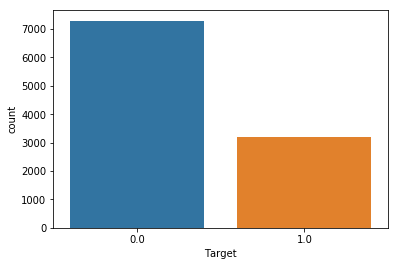

In [56]:
ax = sns.countplot(Train.Target,label="Count")       
N, P = Train.Target.value_counts()
print('Number of Negative: ',N)
print('Number of Positive : ',P)

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with la

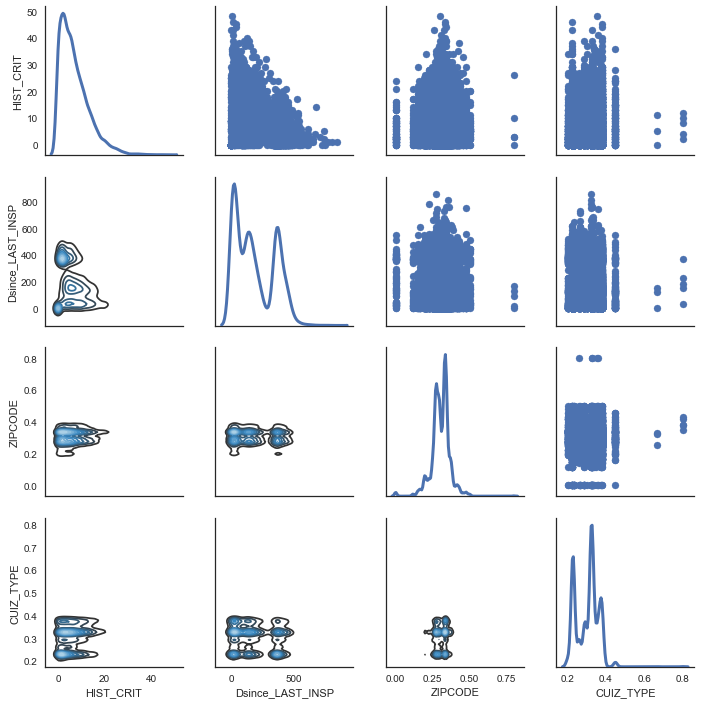

In [65]:
sns.set(style="white")
df = Train.loc[:,['HIST_CRIT','Dsince_LAST_INSP','ZIPCODE','CUIZ_TYPE']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

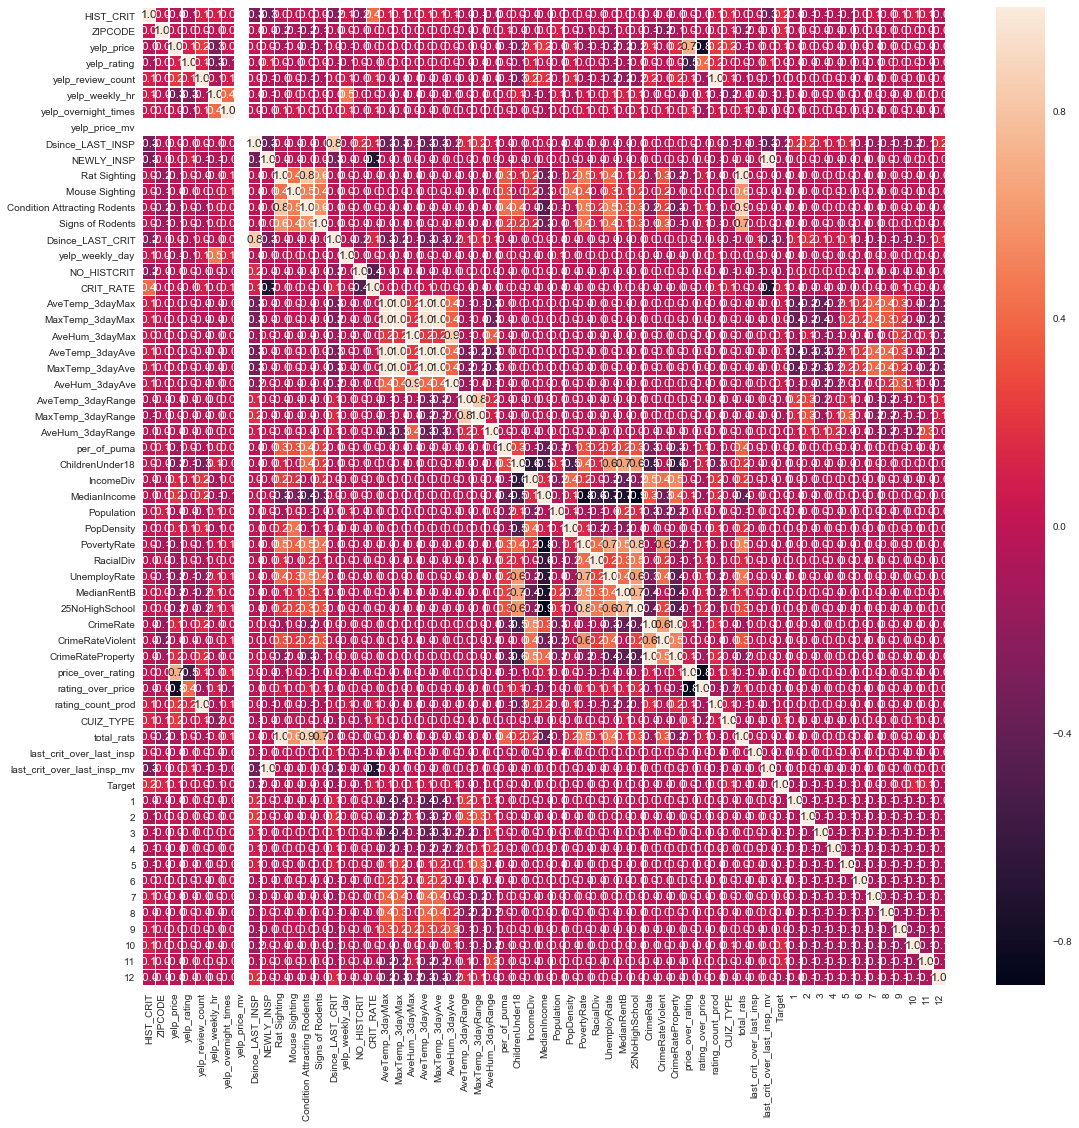

In [64]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(Train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [147]:
X_train = Train.drop('Target',axis = 1)
Y_train = Train.Target

In [149]:
Y_train.shape

(10490,)

In [71]:
#Feature selection with EFECV
from sklearn.feature_selection import RFECV

from sklearn.ensemble import RandomForestClassifier

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='roc_auc')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, Y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 57
Best features : Index([                   'HIST_CRIT',                      'ZIPCODE',
                         'yelp_price',                  'yelp_rating',
                  'yelp_review_count',               'yelp_weekly_hr',
               'yelp_overnight_times',             'Dsince_LAST_INSP',
                         'NEWLY_INSP',                 'Rat Sighting',
                     'Mouse Sighting', 'Condition Attracting Rodents',
                   'Signs of Rodents',             'Dsince_LAST_CRIT',
                    'yelp_weekly_day',                    'CRIT_RATE',
                    'AveTemp_3dayMax',              'MaxTemp_3dayMax',
                     'AveHum_3dayMax',              'AveTemp_3dayAve',
                    'MaxTemp_3dayAve',               'AveHum_3dayAve',
                  'AveTemp_3dayRange',            'MaxTemp_3dayRange',
                   'AveHum_3dayRange',                  'per_of_puma',
                    'Children

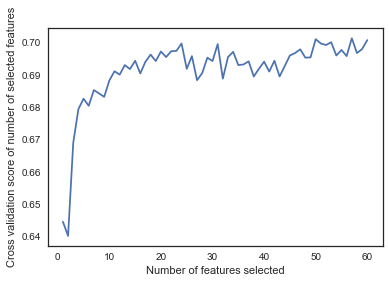

In [72]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [80]:
sfm.transform(X_train)

/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)


array([], shape=(10490, 0), dtype=float64)

In [85]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l1"))
embeded_lr_selector.fit(X_train, Y_train)



SelectFromModel(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
        norm_order=1, prefit=False, threshold=None)

In [86]:
embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X_train.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')
print(embeded_lr_feature)


51 selected features
['HIST_CRIT', 'ZIPCODE', 'yelp_price', 'yelp_rating', 'yelp_review_count', 'yelp_weekly_hr', 'yelp_overnight_times', 'Dsince_LAST_INSP', 'NEWLY_INSP', 'Rat Sighting', 'Mouse Sighting', 'Condition Attracting Rodents', 'Signs of Rodents', 'Dsince_LAST_CRIT', 'yelp_weekly_day', 'NO_HISTCRIT', 'CRIT_RATE', 'AveTemp_3dayMax', 'MaxTemp_3dayMax', 'AveHum_3dayMax', 'AveTemp_3dayAve', 'MaxTemp_3dayAve', 'AveHum_3dayAve', 'AveTemp_3dayRange', 'MaxTemp_3dayRange', 'AveHum_3dayRange', 'per_of_puma', 'IncomeDiv', 'PopDensity', 'RacialDiv', 'CrimeRate', 'CrimeRateViolent', 'CrimeRateProperty', 'price_over_rating', 'rating_over_price', 'rating_count_prod', 'CUIZ_TYPE', 'total_rats', 'last_crit_over_last_insp', 'last_crit_over_last_insp_mv', 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12]


In [88]:
#random forest

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100))
embeded_rf_selector.fit(X_train, Y_train)
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X_train.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')
print(embeded_rf_feature)

27 selected features
['HIST_CRIT', 'ZIPCODE', 'yelp_rating', 'yelp_review_count', 'yelp_weekly_hr', 'Dsince_LAST_INSP', 'Rat Sighting', 'Mouse Sighting', 'Condition Attracting Rodents', 'Signs of Rodents', 'Dsince_LAST_CRIT', 'CRIT_RATE', 'AveTemp_3dayMax', 'MaxTemp_3dayMax', 'AveHum_3dayMax', 'AveTemp_3dayAve', 'MaxTemp_3dayAve', 'AveHum_3dayAve', 'AveTemp_3dayRange', 'MaxTemp_3dayRange', 'AveHum_3dayRange', 'per_of_puma', 'price_over_rating', 'rating_over_price', 'rating_count_prod', 'CUIZ_TYPE', 'total_rats']


In [110]:
#estimator 1000 min samples split = 5 min_sample leaf = 20  n jolbs = -1 oob = True



# Logistic regression on normal features parameter tuning



In [124]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV # k folds validation using all data as validation set
from sklearn.cross_validation import KFold

kfolds = KFold(X_train.shape[0], n_folds = 5)


#Create a set of steps. All but the last step is a transformer (something that processes data). 
#Build a list of steps, where the first is StandardScaler and the second is LogisticRegression
#The last step should be an estimator.

steps = [('scaler', StandardScaler()),
         ('lr', LogisticRegression())] #first normalization and then logistic regression

#Now set up the pipeline
pipeline = Pipeline(steps)

#Now set up the parameter grid, paying close to the correct convention here
parameters_scaler = dict(lr__C = [10**i for i in range(-3, 3)],
                  lr__penalty = ['l1', 'l2'])

#Now run another grid search
lr_grid_search_scaler = GridSearchCV(pipeline, param_grid = parameters_scaler, cv = kfolds, scoring = 'roc_auc')
lr_grid_search_scaler.fit(X_train, Y_train)


#Again, print the score of the best model
best_2 = lr_grid_search_scaler.best_score_
print(best_2)

/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


0.7024720081560748


In [146]:
Y_train.shape

(2623,)

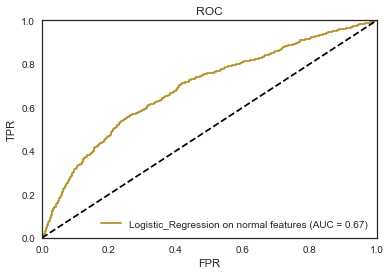

In [150]:
X_train = Train.drop('Target',axis = 1,inplace = False)
Y_train = Train.Target
X_test = Test.drop('Target',axis = 1,inplace = False)
Y_test = Test.Target

LRC = LogisticRegression(C= 0.1, penalty = 'l1').fit(X_train,Y_train)

from sklearn import metrics
def plotAUC(truth, Xtest, lab, model):
    fpr, tpr, thresholds = metrics.roc_curve(truth, model.predict_proba(Xtest)[:,1])
    roc_auc = metrics.roc_auc_score(model.predict(Xtest),truth)
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color=c, label= lab+' (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="lower right")
    
plotAUC(Y_test,X_test,'Logistic_Regression on normal features',LRC)  


In [125]:
lr_grid_search_scaler.best_params_

{'lr__C': 0.1, 'lr__penalty': 'l1'}

In [159]:
traintext.shape

(10490, 7485)

In [153]:
# Traintext = pd.read_csv('trainset.csv')
# Testtext = pd.read_csv('testset.csv')
# (Traintext,Testtext) = batchencoder(Traintext,Testtext,col = ['ZIPCODE','MONTH','CUIZ_TYPE'],method = ['target','onehot','target'],targ = 'Target',usetext = True)
# (traintext,testtext) = gettextfeature(Traintext['reviews'],Testtext['reviews'],stopwords = 'english',binary = False,min_df = .0025, max_df = .1)


# steps = [
#          ('lr', LogisticRegression())] #first normalization and then logistic regression

# #Now set up the pipeline
# pipeline = Pipeline(steps)

# #Now set up the parameter grid, paying close to the correct convention here
# parameters_scaler = dict(lr__C = [10**i for i in range(-3, 3)],
#                   lr__penalty = ['l1', 'l2'])

# #Now run another grid search
# lr_grid_search_scaler_text = GridSearchCV(pipeline, param_grid = parameters_scaler, cv = kfolds, scoring = 'roc_auc')
# lr_grid_search_scaler_text.fit(traintext, Y_train)


# #Again, print the score of the best model
# best_text = lr_grid_search_scaler_text.best_score_
# print(best_text)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Top weighted term in trainset:           term    weight
6528     sushi  0.013941
1059   chinese  0.011711
6625       tea  0.010502
5752  sandwich  0.010376
805     burger  0.009980
533       beer  0.009541
773     brunch  0.009271
2585     fries  0.008970
1383     cream  0.008801
3399   italian  0.008684
3289       ice  0.008660
6001      shop  0.008593
7343      wine  0.008088
6231     spicy  0.007854
5700      rude  0.007699
6407     store  0.007589
4002      meat  0.007514
765   brooklyn  0.007454
2482      free  0.007384
1441      cute  0.007318
0.5888827770754654


In [155]:
# lr_grid_search_scaler_text.best_params_

{'lr__C': 0.1, 'lr__penalty': 'l2'}

# Feature Selection

In [371]:
Train = pd.read_csv('trainset.csv')
Test = pd.read_csv('testset.csv')
(Train1,Test1) = batchencoder(Train,Test,col = ['ZIPCODE','MONTH','CUIZ_TYPE'],method = ['target','onehot','target'])
X_Train1 = Train1.drop(columns = 'Target',axis = 1,inplace = False)
Y_Train1 = Train1.Target
X_Test1 = Test1.drop(columns = 'Target',axis = 1,inplace = False)
Y_Test1 = Test1.Target

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [281]:
X_Train1.columns

Index([                   'HIST_CRIT',                      'ZIPCODE',
                         'yelp_price',                  'yelp_rating',
                  'yelp_review_count',               'yelp_weekly_hr',
               'yelp_overnight_times',                'yelp_price_mv',
                   'Dsince_LAST_INSP',                   'NEWLY_INSP',
                       'Rat Sighting',               'Mouse Sighting',
       'Condition Attracting Rodents',             'Signs of Rodents',
                   'Dsince_LAST_CRIT',              'yelp_weekly_day',
                        'NO_HISTCRIT',                    'CRIT_RATE',
                    'AveTemp_3dayMax',              'MaxTemp_3dayMax',
                     'AveHum_3dayMax',              'AveTemp_3dayAve',
                    'MaxTemp_3dayAve',               'AveHum_3dayAve',
                  'AveTemp_3dayRange',            'MaxTemp_3dayRange',
                   'AveHum_3dayRange',                  'per_of_puma',
      

In [369]:
Train = pd.read_csv('trainset.csv')
Test = pd.read_csv('testset.csv')
(Train3,Test3) = batchencoder(Train,Test,col = ['ZIPCODE','MONTH','CUIZ_TYPE'],method = ['onehot','onehot','onehot'])
X_Train3 = Train3.drop(columns = 'Target',axis = 1,inplace = False)
Y_Train3 = Train3.Target
X_Test3 = Test3.drop(columns = 'Target',axis = 1,inplace = False)
Y_Test3 = Test3.Target

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [370]:
Train = pd.read_csv('trainset.csv')
Test = pd.read_csv('testset.csv')
(Train2,Test2) = batchencoder(Train,Test,col = ['ZIPCODE','MONTH','CUIZ_TYPE'],method = ['target','onehot','onehot'])
X_Train2 = Train2.drop(columns = 'Target',axis = 1,inplace = False)
Y_Train2 = Train2.Target
X_Test2 = Test2.drop(columns = 'Target',axis = 1,inplace = False)
Y_Test2 = Test2.Target

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [282]:

def getfeaturesets(trainx,trainy,method):
    
#generate feature sets
    if method == 'rfecv':
        clf_rf_4 = RandomForestClassifier() 
        rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='roc_auc')   #5-fold cross-validation
        rfecv = rfecv.fit(trainx, trainy)
        feat = trainx.columns[rfecv.support_].values

# print('Optimal number of features :', rfecv.n_features_)
# print('Best features :', X_train.columns[rfecv.support_])
    elif method == 'lr'
        embeded_lr_selector = SelectFromModel(LogisticRegression(C = 0.1,penalty="l1"))
        embeded_lr_selector.fit(trainx, trainy)
        embeded_lr_support = embeded_lr_selector.get_support()
        feat = trainx.loc[:,embeded_lr_support].columns.values
# print(str(len(embeded_lr_feature)), 'selected features')
# print(embeded_lr_feature)
    elif method = 'rf':
        embeded_rf_selector = SelectFromModel(RandomForestClassifier(criterion='entropy', bootstrap=True, max_depth=75, n_estimators=1200, max_features=0.2, min_samples_split=20, min_samples_leaf=3, n_jobs = -1, oob_score=True))
        embeded_rf_selector.fit(trainx, trainy)
        embeded_rf_support = embeded_rf_selector.get_support()
        feat = trainx.loc[:,embeded_rf_support].columns.values
#     print(str(len(embeded_rf_feature)), 'selected features')
#     print(embeded_rf_feature)

    return feat


In [283]:
(feat_rfecv1,feat_lr1,feat_rf1) = getfeaturesets(X_Train1,Y_Train1)
#(feat_rfecv2,feat_lr2,feat_rf2) = getfeaturesets(X_Train2,Y_Train2)

In [289]:
def plotAUC(truth, pred, lab,key):
    fpr, tpr, thresholds = metrics.roc_curve(truth, pred)
    roc_auc = metrics.roc_auc_score(truth, pred)
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color=c, label= lab+'_'+key+' (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="lower right")
    

In [379]:
Train1.columns

Index([                   'HIST_CRIT',                      'ZIPCODE',
                         'yelp_price',                  'yelp_rating',
                  'yelp_review_count',               'yelp_weekly_hr',
               'yelp_overnight_times',                'yelp_price_mv',
                   'Dsince_LAST_INSP',                   'NEWLY_INSP',
                       'Rat Sighting',               'Mouse Sighting',
       'Condition Attracting Rodents',             'Signs of Rodents',
                   'Dsince_LAST_CRIT',              'yelp_weekly_day',
                        'NO_HISTCRIT',                    'CRIT_RATE',
                    'AveTemp_3dayMax',              'MaxTemp_3dayMax',
                     'AveHum_3dayMax',              'AveTemp_3dayAve',
                    'MaxTemp_3dayAve',               'AveHum_3dayAve',
                  'AveTemp_3dayRange',            'MaxTemp_3dayRange',
                   'AveHum_3dayRange',                  'per_of_puma',
      

In [399]:
def getprediction(model,trainx,trainy,testx,lgmflag = 1):
    if model == 'lgm':
        
        if lgmflag == 1:
            scalar = MinMaxScaler()
            scalar.fit(trainx)
            trainx = scalar.transform(trainx)
            testx = scalar.transform(testx)
        
        #created dataset for lightgbm
        lgb_train = lgb.Dataset(trainx, trainy)
        

    # specify your configurations as a dict
        params = {
            'colsample_bytree':0.4,
            
            'boosting_type': 'gbdt',
            'objective': 'binary',
            'metric': 'binary_logloss',
            'is_unbalance': 'true',         # base rate: 0.30
            'num_leaves': 12,
            "num_threads": 4,
            'learning_rate': 0.01,
            'feature_fraction': 0.9,
            'bagging_fraction': 0.8,
            'bagging_freq': 5,
            'n_estimators': 500,
            'verbose': 0
        }

    # train
        if lgmflag == 1: 
            gbm = lgb.train(params,
                        lgb_train,
                        num_boost_round=10,
                        valid_sets=lgb_train,  # eval training data
                        categorical_feature = 'auto')
        else:
            gbm = lgb.train(params,
                        lgb_train,
                        num_boost_round=10,
                        valid_sets=lgb_train,  # eval training data
                        categorical_feature = ['CUIZ_TYPE_LABEL','ZIPCODE','MONTH']
                        )
            


# predict
        y_pred = gbm.predict(testx, num_iteration=gbm.best_iteration)
    
    elif model == 'lr':
        LRC = LogisticRegression(C= 0.1, penalty = 'l1').fit(trainx,trainy)
        y_pred = LRC.predict_proba(testx)[:,1]
    elif model == 'rf':
        RF = RandomForestClassifier(criterion='entropy', bootstrap=True, max_depth=75, n_estimators=1200, max_features=0.2, min_samples_split=20, min_samples_leaf=3, n_jobs = -1, oob_score=True).fit(trainx,trainy)
        y_pred = RF.predict_proba(testx)[:,1]
        
    return y_pred
        
        
        


In [287]:
featuresets

{'rfecvs': array(['HIST_CRIT', 'ZIPCODE', 'yelp_price', 'yelp_rating',
        'yelp_review_count', 'yelp_weekly_hr', 'yelp_overnight_times',
        'Dsince_LAST_INSP', 'Rat Sighting', 'Mouse Sighting',
        'Condition Attracting Rodents', 'Signs of Rodents',
        'Dsince_LAST_CRIT', 'yelp_weekly_day', 'CRIT_RATE',
        'AveTemp_3dayMax', 'MaxTemp_3dayMax', 'AveHum_3dayMax',
        'AveTemp_3dayAve', 'MaxTemp_3dayAve', 'AveHum_3dayAve',
        'AveTemp_3dayRange', 'MaxTemp_3dayRange', 'AveHum_3dayRange',
        'per_of_puma', 'ChildrenUnder18', 'IncomeDiv', 'MedianIncome',
        'Population', 'PopDensity', 'PovertyRate', 'RacialDiv',
        'UnemployRate', 'MedianRentB', '25NoHighSchool', 'CrimeRate',
        'CrimeRateViolent', 'CrimeRateProperty', 'price_over_rating',
        'rating_over_price', 'rating_count_prod', 'CUIZ_TYPE',
        'total_rats', 'last_crit_over_last_insp', 2, 4, 7, 8, 9, 10, 11],
       dtype=object),
 'lrs': array(['HIST_CRIT', 'ZIPCODE', 'yelp

/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.612154
[2]	training's binary_logloss: 0.609804
[3]	training's binary_logloss: 0.607198
[4]	training's binary_logloss: 0.604787
[5]	training's binary_logloss: 0.602794
[6]	training's binary_logloss: 0.60085
[7]	training's binary_logloss: 0.598813
[8]	training's binary_logloss: 0.596826
[9]	training's binary_logloss: 0.595058
[10]	training's binary_logloss: 0.593275
[11]	training's binary_logloss: 0.59175
[12]	training's binary_logloss: 0.59032
[13]	training's binary_logloss: 0.588905
[14]	training's binary_logloss: 0.587558
[15]	training's binary_logloss: 0.586381
[16]	training's binary_logloss: 0.585209
[17]	training's binary_logloss: 0.584171
[18]	training's binary_logloss: 0.583142
[19]	training's binary_logloss: 0.582129
[20]	training's binary_logloss: 0.581199
[21]	training's binary_logloss: 0.580224
[22]	training's binary_logloss: 0.579367
[23]	training's binary_logloss: 0.578479
[24]	training's binary_logloss: 0.577655
[25]	training's binary_loglo

[394]	training's binary_logloss: 0.450671
[395]	training's binary_logloss: 0.450378
[396]	training's binary_logloss: 0.450071
[397]	training's binary_logloss: 0.449784
[398]	training's binary_logloss: 0.44949
[399]	training's binary_logloss: 0.449228
[400]	training's binary_logloss: 0.448932
[401]	training's binary_logloss: 0.448595
[402]	training's binary_logloss: 0.448264
[403]	training's binary_logloss: 0.447946
[404]	training's binary_logloss: 0.447634
[405]	training's binary_logloss: 0.447336
[406]	training's binary_logloss: 0.447033
[407]	training's binary_logloss: 0.446733
[408]	training's binary_logloss: 0.446411
[409]	training's binary_logloss: 0.446123
[410]	training's binary_logloss: 0.445834
[411]	training's binary_logloss: 0.445595
[412]	training's binary_logloss: 0.445361
[413]	training's binary_logloss: 0.445144
[414]	training's binary_logloss: 0.444903
[415]	training's binary_logloss: 0.444717
[416]	training's binary_logloss: 0.444381
[417]	training's binary_logloss: 0.

[784]	training's binary_logloss: 0.350267
[785]	training's binary_logloss: 0.350038
[786]	training's binary_logloss: 0.349804
[787]	training's binary_logloss: 0.349596
[788]	training's binary_logloss: 0.34937
[789]	training's binary_logloss: 0.349154
[790]	training's binary_logloss: 0.348938
[791]	training's binary_logloss: 0.34872
[792]	training's binary_logloss: 0.348507
[793]	training's binary_logloss: 0.3482
[794]	training's binary_logloss: 0.347923
[795]	training's binary_logloss: 0.347714
[796]	training's binary_logloss: 0.347533
[797]	training's binary_logloss: 0.34738
[798]	training's binary_logloss: 0.347236
[799]	training's binary_logloss: 0.347097
[800]	training's binary_logloss: 0.346909
[801]	training's binary_logloss: 0.346628
[802]	training's binary_logloss: 0.346374
[803]	training's binary_logloss: 0.346128
[804]	training's binary_logloss: 0.345894
[805]	training's binary_logloss: 0.345726
[806]	training's binary_logloss: 0.345451
[807]	training's binary_logloss: 0.3452

/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.612328
[2]	training's binary_logloss: 0.60963
[3]	training's binary_logloss: 0.60712
[4]	training's binary_logloss: 0.604958
[5]	training's binary_logloss: 0.602675
[6]	training's binary_logloss: 0.600478
[7]	training's binary_logloss: 0.598556
[8]	training's binary_logloss: 0.596626
[9]	training's binary_logloss: 0.59489
[10]	training's binary_logloss: 0.593173
[11]	training's binary_logloss: 0.591717
[12]	training's binary_logloss: 0.590186
[13]	training's binary_logloss: 0.58876
[14]	training's binary_logloss: 0.587484
[15]	training's binary_logloss: 0.586231
[16]	training's binary_logloss: 0.585002
[17]	training's binary_logloss: 0.583976
[18]	training's binary_logloss: 0.583094
[19]	training's binary_logloss: 0.58199
[20]	training's binary_logloss: 0.581155
[21]	training's binary_logloss: 0.580204
[22]	training's binary_logloss: 0.579359
[23]	training's binary_logloss: 0.578625
[24]	training's binary_logloss: 0.577931
[25]	training's binary_logloss

[394]	training's binary_logloss: 0.454543
[395]	training's binary_logloss: 0.454215
[396]	training's binary_logloss: 0.453922
[397]	training's binary_logloss: 0.45365
[398]	training's binary_logloss: 0.453377
[399]	training's binary_logloss: 0.453109
[400]	training's binary_logloss: 0.45282
[401]	training's binary_logloss: 0.452456
[402]	training's binary_logloss: 0.45211
[403]	training's binary_logloss: 0.451798
[404]	training's binary_logloss: 0.451524
[405]	training's binary_logloss: 0.45125
[406]	training's binary_logloss: 0.450943
[407]	training's binary_logloss: 0.450613
[408]	training's binary_logloss: 0.450282
[409]	training's binary_logloss: 0.44997
[410]	training's binary_logloss: 0.44969
[411]	training's binary_logloss: 0.449463
[412]	training's binary_logloss: 0.449217
[413]	training's binary_logloss: 0.448982
[414]	training's binary_logloss: 0.448732
[415]	training's binary_logloss: 0.44845
[416]	training's binary_logloss: 0.448175
[417]	training's binary_logloss: 0.447903

[784]	training's binary_logloss: 0.354384
[785]	training's binary_logloss: 0.354181
[786]	training's binary_logloss: 0.353961
[787]	training's binary_logloss: 0.353747
[788]	training's binary_logloss: 0.353542
[789]	training's binary_logloss: 0.353339
[790]	training's binary_logloss: 0.353159
[791]	training's binary_logloss: 0.352887
[792]	training's binary_logloss: 0.352654
[793]	training's binary_logloss: 0.352408
[794]	training's binary_logloss: 0.352155
[795]	training's binary_logloss: 0.351925
[796]	training's binary_logloss: 0.351817
[797]	training's binary_logloss: 0.35167
[798]	training's binary_logloss: 0.351511
[799]	training's binary_logloss: 0.351367
[800]	training's binary_logloss: 0.351133
[801]	training's binary_logloss: 0.350908
[802]	training's binary_logloss: 0.350674
[803]	training's binary_logloss: 0.350437
[804]	training's binary_logloss: 0.350218
[805]	training's binary_logloss: 0.349991
[806]	training's binary_logloss: 0.349721
[807]	training's binary_logloss: 0.

/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.612256
[2]	training's binary_logloss: 0.60975
[3]	training's binary_logloss: 0.60747
[4]	training's binary_logloss: 0.605374
[5]	training's binary_logloss: 0.60341
[6]	training's binary_logloss: 0.601436
[7]	training's binary_logloss: 0.599557
[8]	training's binary_logloss: 0.597869
[9]	training's binary_logloss: 0.596272
[10]	training's binary_logloss: 0.594759
[11]	training's binary_logloss: 0.593278
[12]	training's binary_logloss: 0.59195
[13]	training's binary_logloss: 0.590653
[14]	training's binary_logloss: 0.589459
[15]	training's binary_logloss: 0.588243
[16]	training's binary_logloss: 0.587213
[17]	training's binary_logloss: 0.586199
[18]	training's binary_logloss: 0.58528
[19]	training's binary_logloss: 0.584344
[20]	training's binary_logloss: 0.583497
[21]	training's binary_logloss: 0.582607
[22]	training's binary_logloss: 0.581857
[23]	training's binary_logloss: 0.581105
[24]	training's binary_logloss: 0.580446
[25]	training's binary_logloss

[394]	training's binary_logloss: 0.461231
[395]	training's binary_logloss: 0.460897
[396]	training's binary_logloss: 0.460606
[397]	training's binary_logloss: 0.460296
[398]	training's binary_logloss: 0.459992
[399]	training's binary_logloss: 0.45967
[400]	training's binary_logloss: 0.459392
[401]	training's binary_logloss: 0.459123
[402]	training's binary_logloss: 0.458821
[403]	training's binary_logloss: 0.45854
[404]	training's binary_logloss: 0.458315
[405]	training's binary_logloss: 0.458086
[406]	training's binary_logloss: 0.457823
[407]	training's binary_logloss: 0.457557
[408]	training's binary_logloss: 0.457245
[409]	training's binary_logloss: 0.456938
[410]	training's binary_logloss: 0.456621
[411]	training's binary_logloss: 0.456392
[412]	training's binary_logloss: 0.456153
[413]	training's binary_logloss: 0.455924
[414]	training's binary_logloss: 0.455689
[415]	training's binary_logloss: 0.455436
[416]	training's binary_logloss: 0.455137
[417]	training's binary_logloss: 0.4

[784]	training's binary_logloss: 0.363137
[785]	training's binary_logloss: 0.362925
[786]	training's binary_logloss: 0.362709
[787]	training's binary_logloss: 0.362496
[788]	training's binary_logloss: 0.362293
[789]	training's binary_logloss: 0.362071
[790]	training's binary_logloss: 0.361867
[791]	training's binary_logloss: 0.361641
[792]	training's binary_logloss: 0.361423
[793]	training's binary_logloss: 0.361193
[794]	training's binary_logloss: 0.360982
[795]	training's binary_logloss: 0.360773
[796]	training's binary_logloss: 0.360584
[797]	training's binary_logloss: 0.360364
[798]	training's binary_logloss: 0.360157
[799]	training's binary_logloss: 0.359956
[800]	training's binary_logloss: 0.359768
[801]	training's binary_logloss: 0.359562
[802]	training's binary_logloss: 0.359363
[803]	training's binary_logloss: 0.359108
[804]	training's binary_logloss: 0.358931
[805]	training's binary_logloss: 0.358665
[806]	training's binary_logloss: 0.358458
[807]	training's binary_logloss: 0

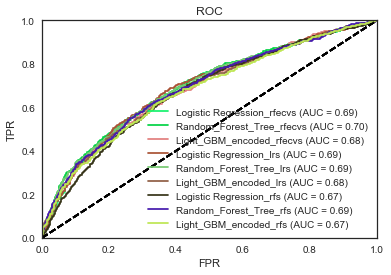

In [290]:
featuresets = {'rfecvs':feat_rfecv1,'lrs':feat_lr1,'rfs':feat_rf1}

#demonstrate features on four models:
 
        
for key, feat in featuresets.items():
    X_train1 = X_Train1[feat]
   
    X_test1 = X_Test1[feat]
   
    
#     if 'CUIZ_TYPE' in feat:
#         np.place(feat, feat == 'CUIZ_TYPE', 'CUIZ_TYPE_LABEL')
        
#     X_Train2 = X_Train2[feat]
#     Y_Train2 = Y_Train2[feat]
#     X_Test2 = X_Test2[feat]
#     Y_Test2 = Y_Test2[feat]
    
    
    predlgm1 = getprediction('lgm',X_train1,Y_Train1,X_test1,lgmflag = 1)
#     predlgm2 = getprediction('lgm',X_Train2,Y_Train2,X_Test2,lgmflag = 0)
    predlr = getprediction('lr',X_train1,Y_Train1,X_test1)
    predrf = getprediction('rf',X_train1,Y_Train1,X_test1)


    plotAUC(Y_Test1,predlr,'Logistic Regression',key)  
    plotAUC(Y_Test1,predrf,'Random_Forest_Tree',key)  
    plotAUC(Y_Test1,predlgm1,'Light_GBM_encoded',key)
#     plotAUC(Y_Test2,predlgm2,'Light_GBM_noenc',key) 

/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.611876
[2]	training's binary_logloss: 0.609441
[3]	training's binary_logloss: 0.606921
[4]	training's binary_logloss: 0.604489
[5]	training's binary_logloss: 0.602286
[6]	training's binary_logloss: 0.600155
[7]	training's binary_logloss: 0.59818
[8]	training's binary_logloss: 0.596326
[9]	training's binary_logloss: 0.594571
[10]	training's binary_logloss: 0.59296
[11]	training's binary_logloss: 0.591508
[12]	training's binary_logloss: 0.590088
[13]	training's binary_logloss: 0.588836
[14]	training's binary_logloss: 0.587474
[15]	training's binary_logloss: 0.586245
[16]	training's binary_logloss: 0.585094
[17]	training's binary_logloss: 0.584054
[18]	training's binary_logloss: 0.583036
[19]	training's binary_logloss: 0.582113
[20]	training's binary_logloss: 0.581259
[21]	training's binary_logloss: 0.58027
[22]	training's binary_logloss: 0.579279
[23]	training's binary_logloss: 0.578412
[24]	training's binary_logloss: 0.577567
[25]	training's binary_loglo

[394]	training's binary_logloss: 0.449797
[395]	training's binary_logloss: 0.449527
[396]	training's binary_logloss: 0.449189
[397]	training's binary_logloss: 0.448884
[398]	training's binary_logloss: 0.448574
[399]	training's binary_logloss: 0.448278
[400]	training's binary_logloss: 0.448005
[401]	training's binary_logloss: 0.44767
[402]	training's binary_logloss: 0.447368
[403]	training's binary_logloss: 0.447071
[404]	training's binary_logloss: 0.446855
[405]	training's binary_logloss: 0.446604
[406]	training's binary_logloss: 0.446248
[407]	training's binary_logloss: 0.445967
[408]	training's binary_logloss: 0.445636
[409]	training's binary_logloss: 0.445328
[410]	training's binary_logloss: 0.445024
[411]	training's binary_logloss: 0.444747
[412]	training's binary_logloss: 0.444476
[413]	training's binary_logloss: 0.444223
[414]	training's binary_logloss: 0.443993
[415]	training's binary_logloss: 0.443737
[416]	training's binary_logloss: 0.443462
[417]	training's binary_logloss: 0.

[784]	training's binary_logloss: 0.349551
[785]	training's binary_logloss: 0.349347
[786]	training's binary_logloss: 0.349102
[787]	training's binary_logloss: 0.348862
[788]	training's binary_logloss: 0.348629
[789]	training's binary_logloss: 0.348427
[790]	training's binary_logloss: 0.348227
[791]	training's binary_logloss: 0.348009
[792]	training's binary_logloss: 0.34782
[793]	training's binary_logloss: 0.34757
[794]	training's binary_logloss: 0.347333
[795]	training's binary_logloss: 0.347056
[796]	training's binary_logloss: 0.346831
[797]	training's binary_logloss: 0.346579
[798]	training's binary_logloss: 0.346328
[799]	training's binary_logloss: 0.346089
[800]	training's binary_logloss: 0.345938
[801]	training's binary_logloss: 0.345704
[802]	training's binary_logloss: 0.34548
[803]	training's binary_logloss: 0.345224
[804]	training's binary_logloss: 0.345042
[805]	training's binary_logloss: 0.344799
[806]	training's binary_logloss: 0.344534
[807]	training's binary_logloss: 0.34

/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.611876
[2]	training's binary_logloss: 0.609441
[3]	training's binary_logloss: 0.606921
[4]	training's binary_logloss: 0.604489
[5]	training's binary_logloss: 0.602286
[6]	training's binary_logloss: 0.600155
[7]	training's binary_logloss: 0.59818
[8]	training's binary_logloss: 0.596326
[9]	training's binary_logloss: 0.594571
[10]	training's binary_logloss: 0.59296
[11]	training's binary_logloss: 0.591508
[12]	training's binary_logloss: 0.590088
[13]	training's binary_logloss: 0.588836
[14]	training's binary_logloss: 0.587474
[15]	training's binary_logloss: 0.586245
[16]	training's binary_logloss: 0.585094
[17]	training's binary_logloss: 0.584054
[18]	training's binary_logloss: 0.583036
[19]	training's binary_logloss: 0.582113
[20]	training's binary_logloss: 0.581259
[21]	training's binary_logloss: 0.58027
[22]	training's binary_logloss: 0.579279
[23]	training's binary_logloss: 0.578412
[24]	training's binary_logloss: 0.577567
[25]	training's binary_loglo

[394]	training's binary_logloss: 0.449797
[395]	training's binary_logloss: 0.449527
[396]	training's binary_logloss: 0.449189
[397]	training's binary_logloss: 0.448884
[398]	training's binary_logloss: 0.448574
[399]	training's binary_logloss: 0.448278
[400]	training's binary_logloss: 0.448005
[401]	training's binary_logloss: 0.44767
[402]	training's binary_logloss: 0.447368
[403]	training's binary_logloss: 0.447071
[404]	training's binary_logloss: 0.446855
[405]	training's binary_logloss: 0.446604
[406]	training's binary_logloss: 0.446248
[407]	training's binary_logloss: 0.445967
[408]	training's binary_logloss: 0.445636
[409]	training's binary_logloss: 0.445328
[410]	training's binary_logloss: 0.445024
[411]	training's binary_logloss: 0.444747
[412]	training's binary_logloss: 0.444476
[413]	training's binary_logloss: 0.444223
[414]	training's binary_logloss: 0.443993
[415]	training's binary_logloss: 0.443737
[416]	training's binary_logloss: 0.443462
[417]	training's binary_logloss: 0.

[784]	training's binary_logloss: 0.349551
[785]	training's binary_logloss: 0.349347
[786]	training's binary_logloss: 0.349102
[787]	training's binary_logloss: 0.348862
[788]	training's binary_logloss: 0.348629
[789]	training's binary_logloss: 0.348427
[790]	training's binary_logloss: 0.348227
[791]	training's binary_logloss: 0.348009
[792]	training's binary_logloss: 0.34782
[793]	training's binary_logloss: 0.34757
[794]	training's binary_logloss: 0.347333
[795]	training's binary_logloss: 0.347056
[796]	training's binary_logloss: 0.346831
[797]	training's binary_logloss: 0.346579
[798]	training's binary_logloss: 0.346328
[799]	training's binary_logloss: 0.346089
[800]	training's binary_logloss: 0.345938
[801]	training's binary_logloss: 0.345704
[802]	training's binary_logloss: 0.34548
[803]	training's binary_logloss: 0.345224
[804]	training's binary_logloss: 0.345042
[805]	training's binary_logloss: 0.344799
[806]	training's binary_logloss: 0.344534
[807]	training's binary_logloss: 0.34

/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.611876
[2]	training's binary_logloss: 0.609441
[3]	training's binary_logloss: 0.606921
[4]	training's binary_logloss: 0.604489
[5]	training's binary_logloss: 0.602286
[6]	training's binary_logloss: 0.600155
[7]	training's binary_logloss: 0.59818
[8]	training's binary_logloss: 0.596326
[9]	training's binary_logloss: 0.594571
[10]	training's binary_logloss: 0.59296
[11]	training's binary_logloss: 0.591508
[12]	training's binary_logloss: 0.590088
[13]	training's binary_logloss: 0.588836
[14]	training's binary_logloss: 0.587474
[15]	training's binary_logloss: 0.586245
[16]	training's binary_logloss: 0.585094
[17]	training's binary_logloss: 0.584054
[18]	training's binary_logloss: 0.583036
[19]	training's binary_logloss: 0.582113
[20]	training's binary_logloss: 0.581259
[21]	training's binary_logloss: 0.58027
[22]	training's binary_logloss: 0.579279
[23]	training's binary_logloss: 0.578412
[24]	training's binary_logloss: 0.577567
[25]	training's binary_loglo

[394]	training's binary_logloss: 0.449797
[395]	training's binary_logloss: 0.449527
[396]	training's binary_logloss: 0.449189
[397]	training's binary_logloss: 0.448884
[398]	training's binary_logloss: 0.448574
[399]	training's binary_logloss: 0.448278
[400]	training's binary_logloss: 0.448005
[401]	training's binary_logloss: 0.44767
[402]	training's binary_logloss: 0.447368
[403]	training's binary_logloss: 0.447071
[404]	training's binary_logloss: 0.446855
[405]	training's binary_logloss: 0.446604
[406]	training's binary_logloss: 0.446248
[407]	training's binary_logloss: 0.445967
[408]	training's binary_logloss: 0.445636
[409]	training's binary_logloss: 0.445328
[410]	training's binary_logloss: 0.445024
[411]	training's binary_logloss: 0.444747
[412]	training's binary_logloss: 0.444476
[413]	training's binary_logloss: 0.444223
[414]	training's binary_logloss: 0.443993
[415]	training's binary_logloss: 0.443737
[416]	training's binary_logloss: 0.443462
[417]	training's binary_logloss: 0.

[784]	training's binary_logloss: 0.349551
[785]	training's binary_logloss: 0.349347
[786]	training's binary_logloss: 0.349102
[787]	training's binary_logloss: 0.348862
[788]	training's binary_logloss: 0.348629
[789]	training's binary_logloss: 0.348427
[790]	training's binary_logloss: 0.348227
[791]	training's binary_logloss: 0.348009
[792]	training's binary_logloss: 0.34782
[793]	training's binary_logloss: 0.34757
[794]	training's binary_logloss: 0.347333
[795]	training's binary_logloss: 0.347056
[796]	training's binary_logloss: 0.346831
[797]	training's binary_logloss: 0.346579
[798]	training's binary_logloss: 0.346328
[799]	training's binary_logloss: 0.346089
[800]	training's binary_logloss: 0.345938
[801]	training's binary_logloss: 0.345704
[802]	training's binary_logloss: 0.34548
[803]	training's binary_logloss: 0.345224
[804]	training's binary_logloss: 0.345042
[805]	training's binary_logloss: 0.344799
[806]	training's binary_logloss: 0.344534
[807]	training's binary_logloss: 0.34

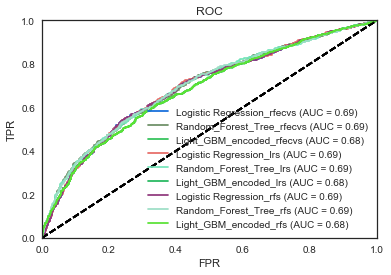

In [291]:
for key,feat in featuresets.items():
    
    xpredlgm1 = getprediction('lgm',X_Train1,Y_Train1,X_Test1,lgmflag = 1)
#     predlgm2 = getprediction('lgm',X_Train2,Y_Train2,X_Test2,lgmflag = 0)
    xpredlr = getprediction('lr',X_Train1,Y_Train1,X_Test1)
    xpredrf = getprediction('rf',X_Train1,Y_Train1,X_Test1)


    plotAUC(Y_Test1,xpredlr,'Logistic Regression',key)  
    plotAUC(Y_Test1,xpredrf,'Random_Forest_Tree',key)  
    plotAUC(Y_Test1,xpredlgm1,'Light_GBM_encoded',key)


In [299]:
selected = featuresets['rfecvs']


# Test overfitting via cross validation

In [301]:
X_train = X_Train1[selected]
X_test = X_Test1[selected]

In [326]:
from sklearn.model_selection import KFold


def testoverfit(model, dataset, label_name, k):
    # Code here
    kfolds = KFold(n_splits = k)
    aucs = [] #to get auc score for each c in cs
    
    #splitting the data into train and validation set:
    for train_ind,test_ind in kfolds.split(dataset):
        data_train = dataset.iloc[train_ind]
        data_test = dataset.iloc[test_ind] #data_test and data_train is properly dataframe
        
        if model == 'lr':
            lrclf = LogisticRegression(C = 0.1,penalty = 'l1')
            lrclf.fit(data_train.drop(label_name, 1),data_train[label_name])
            aucscore = metrics.roc_auc_score(data_test[label_name], lrclf.predict_proba(data_test.drop(label_name,1))[:,1] ) 
            aucs.append(aucscore)
        elif model == 'rf':
            rfclf = RandomForestClassifier(criterion='entropy', bootstrap=True, max_depth=75, n_estimators=1200, max_features=0.2, min_samples_split=20, min_samples_leaf=3, n_jobs = -1, oob_score=True).fit(data_train.drop(label_name, 1),data_train[label_name])
            aucscore = metrics.roc_auc_score(data_test[label_name], rfclf.predict_proba(data_test.drop(label_name,1))[:,1] ) 
            aucs.append(aucscore)
        elif model == 'lgm':
            
            scalar = MinMaxScaler()
            scalar.fit(data_train.drop(label_name,1))
            trainx = scalar.transform(data_train.drop(label_name,1))
            testx = scalar.transform(data_test.drop(label_name,1))
        
        #created dataset for lightgbm
            lgb_train = lgb.Dataset(trainx, data_train[label_name])
            params = {
            'boosting_type': 'gbdt',
            'objective': 'binary',
            'metric': 'binary_logloss',
            'is_unbalance': 'true',         # base rate: 0.30
            'num_leaves': 36,
            "num_threads": 4,
            'learning_rate': 0.02,
            'feature_fraction': 0.9,
            'bagging_fraction': 0.8,
            'bagging_freq': 5,
            'n_estimators': 1000,
            'verbose': 0
        }

    # train
        
            gbm = lgb.train(params,
                        lgb_train,
                        num_boost_round=10,
                        valid_sets=lgb_train,  # eval training data
                        categorical_feature = 'auto')
       
            
            aucscore = metrics.roc_auc_score(data_test[label_name], gbm.predict(testx, num_iteration=gbm.best_iteration)) 
            aucs.append(aucscore)

            

    mean = np.mean(aucs)
    var = np.var(aucs)
    
    return mean,var

In [356]:
(a,b) = testoverfit('lr', Train1[np.insert(selected,1,'Target')], 'Target', 5)

In [338]:
print(a,b)

0.687380702445566 7.138522991609225e-05


In [331]:
from scipy import stats

pvalue = {}
corr = {}

for col in selected:
    if(np.issubdtype(Train1[col],np.number)):
        
        x = Train1[col]
        test = stats.pointbiserialr(x,Train1['Target'])
        
        pvalue[col] = test.pvalue
        corr[col] = test.correlation
        

In [351]:
selected2 = []
for key,feat in pvalue.items():
    if feat  < 0.1:
        selected2.append(key)
        

In [337]:
corr

{'HIST_CRIT': 0.17762210953110472,
 'ZIPCODE': 0.13315879806549552,
 'yelp_price': 0.05711864596090032,
 'yelp_rating': 0.030778295892907963,
 'yelp_review_count': 0.029052117778875935,
 'yelp_weekly_hr': -0.05693646097375344,
 'yelp_overnight_times': 0.003094975083902041,
 'Dsince_LAST_INSP': -0.15594188441599,
 'Rat Sighting': -0.02141787204498163,
 'Mouse Sighting': -0.01412765395114759,
 'Condition Attracting Rodents': -0.022623821871158658,
 'Signs of Rodents': -0.016428392265235514,
 'Dsince_LAST_CRIT': -0.1384368477640107,
 'yelp_weekly_day': -0.013445432938972848,
 'CRIT_RATE': 0.10030498500111366,
 'AveTemp_3dayMax': 0.060382506680880965,
 'MaxTemp_3dayMax': 0.03898078270248263,
 'AveHum_3dayMax': 0.07549779095409802,
 'AveTemp_3dayAve': 0.06215325620355475,
 'MaxTemp_3dayAve': 0.048984994583048815,
 'AveHum_3dayAve': 0.07166309748176718,
 'AveTemp_3dayRange': -0.03237363598339566,
 'MaxTemp_3dayRange': -0.06795232413835489,
 'AveHum_3dayRange': 0.01647986867462401,
 'per_of_p

In [352]:
selected2.append('Target')

In [353]:
(a2,b2) = testoverfit('lgm', Train1[selected2], 'Target', 5)
print(a2,b2)

/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.612741
[2]	training's binary_logloss: 0.610237
[3]	training's binary_logloss: 0.607538
[4]	training's binary_logloss: 0.605122
[5]	training's binary_logloss: 0.602766
[6]	training's binary_logloss: 0.600749
[7]	training's binary_logloss: 0.598622
[8]	training's binary_logloss: 0.596819
[9]	training's binary_logloss: 0.594973
[10]	training's binary_logloss: 0.593171
[11]	training's binary_logloss: 0.591424
[12]	training's binary_logloss: 0.589955
[13]	training's binary_logloss: 0.588503
[14]	training's binary_logloss: 0.587
[15]	training's binary_logloss: 0.585689
[16]	training's binary_logloss: 0.584449
[17]	training's binary_logloss: 0.583272
[18]	training's binary_logloss: 0.582106
[19]	training's binary_logloss: 0.581182
[20]	training's binary_logloss: 0.580162
[21]	training's binary_logloss: 0.579254
[22]	training's binary_logloss: 0.578299
[23]	training's binary_logloss: 0.577399
[24]	training's binary_logloss: 0.576407
[25]	training's binary_loglo

[394]	training's binary_logloss: 0.432263
[395]	training's binary_logloss: 0.431964
[396]	training's binary_logloss: 0.431545
[397]	training's binary_logloss: 0.431159
[398]	training's binary_logloss: 0.430696
[399]	training's binary_logloss: 0.430292
[400]	training's binary_logloss: 0.429856
[401]	training's binary_logloss: 0.429437
[402]	training's binary_logloss: 0.429029
[403]	training's binary_logloss: 0.42861
[404]	training's binary_logloss: 0.428181
[405]	training's binary_logloss: 0.427788
[406]	training's binary_logloss: 0.427496
[407]	training's binary_logloss: 0.427093
[408]	training's binary_logloss: 0.426734
[409]	training's binary_logloss: 0.426403
[410]	training's binary_logloss: 0.426007
[411]	training's binary_logloss: 0.425606
[412]	training's binary_logloss: 0.425215
[413]	training's binary_logloss: 0.424841
[414]	training's binary_logloss: 0.424475
[415]	training's binary_logloss: 0.424069
[416]	training's binary_logloss: 0.423649
[417]	training's binary_logloss: 0.

[784]	training's binary_logloss: 0.323621
[785]	training's binary_logloss: 0.323398
[786]	training's binary_logloss: 0.323122
[787]	training's binary_logloss: 0.322904
[788]	training's binary_logloss: 0.322644
[789]	training's binary_logloss: 0.322396
[790]	training's binary_logloss: 0.322157
[791]	training's binary_logloss: 0.321898
[792]	training's binary_logloss: 0.321679
[793]	training's binary_logloss: 0.321449
[794]	training's binary_logloss: 0.321216
[795]	training's binary_logloss: 0.320965
[796]	training's binary_logloss: 0.320709
[797]	training's binary_logloss: 0.320501
[798]	training's binary_logloss: 0.320276
[799]	training's binary_logloss: 0.320092
[800]	training's binary_logloss: 0.319857
[801]	training's binary_logloss: 0.319661
[802]	training's binary_logloss: 0.319453
[803]	training's binary_logloss: 0.319215
[804]	training's binary_logloss: 0.319032
[805]	training's binary_logloss: 0.318853
[806]	training's binary_logloss: 0.31861
[807]	training's binary_logloss: 0.

/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.612209
[2]	training's binary_logloss: 0.609648
[3]	training's binary_logloss: 0.6071
[4]	training's binary_logloss: 0.604747
[5]	training's binary_logloss: 0.602459
[6]	training's binary_logloss: 0.60041
[7]	training's binary_logloss: 0.598284
[8]	training's binary_logloss: 0.596421
[9]	training's binary_logloss: 0.594553
[10]	training's binary_logloss: 0.592736
[11]	training's binary_logloss: 0.591095
[12]	training's binary_logloss: 0.589527
[13]	training's binary_logloss: 0.588044
[14]	training's binary_logloss: 0.586478
[15]	training's binary_logloss: 0.585105
[16]	training's binary_logloss: 0.583761
[17]	training's binary_logloss: 0.582568
[18]	training's binary_logloss: 0.581443
[19]	training's binary_logloss: 0.58044
[20]	training's binary_logloss: 0.5793
[21]	training's binary_logloss: 0.578376
[22]	training's binary_logloss: 0.577409
[23]	training's binary_logloss: 0.576568
[24]	training's binary_logloss: 0.575725
[25]	training's binary_logloss:

[394]	training's binary_logloss: 0.430783
[395]	training's binary_logloss: 0.430501
[396]	training's binary_logloss: 0.430143
[397]	training's binary_logloss: 0.429717
[398]	training's binary_logloss: 0.429263
[399]	training's binary_logloss: 0.428845
[400]	training's binary_logloss: 0.428502
[401]	training's binary_logloss: 0.428088
[402]	training's binary_logloss: 0.427714
[403]	training's binary_logloss: 0.427354
[404]	training's binary_logloss: 0.427051
[405]	training's binary_logloss: 0.426676
[406]	training's binary_logloss: 0.426302
[407]	training's binary_logloss: 0.425895
[408]	training's binary_logloss: 0.425501
[409]	training's binary_logloss: 0.425103
[410]	training's binary_logloss: 0.42471
[411]	training's binary_logloss: 0.424423
[412]	training's binary_logloss: 0.424005
[413]	training's binary_logloss: 0.423684
[414]	training's binary_logloss: 0.423294
[415]	training's binary_logloss: 0.422936
[416]	training's binary_logloss: 0.422554
[417]	training's binary_logloss: 0.

[784]	training's binary_logloss: 0.32334
[785]	training's binary_logloss: 0.323107
[786]	training's binary_logloss: 0.3229
[787]	training's binary_logloss: 0.322661
[788]	training's binary_logloss: 0.322436
[789]	training's binary_logloss: 0.32223
[790]	training's binary_logloss: 0.322002
[791]	training's binary_logloss: 0.321711
[792]	training's binary_logloss: 0.32142
[793]	training's binary_logloss: 0.321185
[794]	training's binary_logloss: 0.320938
[795]	training's binary_logloss: 0.320677
[796]	training's binary_logloss: 0.320447
[797]	training's binary_logloss: 0.320219
[798]	training's binary_logloss: 0.320006
[799]	training's binary_logloss: 0.3198
[800]	training's binary_logloss: 0.319597
[801]	training's binary_logloss: 0.319319
[802]	training's binary_logloss: 0.319074
[803]	training's binary_logloss: 0.318812
[804]	training's binary_logloss: 0.318559
[805]	training's binary_logloss: 0.318294
[806]	training's binary_logloss: 0.318039
[807]	training's binary_logloss: 0.317798

/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.608291
[2]	training's binary_logloss: 0.6057
[3]	training's binary_logloss: 0.603131
[4]	training's binary_logloss: 0.600758
[5]	training's binary_logloss: 0.598474
[6]	training's binary_logloss: 0.596393
[7]	training's binary_logloss: 0.594314
[8]	training's binary_logloss: 0.592429
[9]	training's binary_logloss: 0.590567
[10]	training's binary_logloss: 0.58874
[11]	training's binary_logloss: 0.586989
[12]	training's binary_logloss: 0.58539
[13]	training's binary_logloss: 0.583892
[14]	training's binary_logloss: 0.582444
[15]	training's binary_logloss: 0.58102
[16]	training's binary_logloss: 0.579716
[17]	training's binary_logloss: 0.578525
[18]	training's binary_logloss: 0.577393
[19]	training's binary_logloss: 0.576424
[20]	training's binary_logloss: 0.575227
[21]	training's binary_logloss: 0.574245
[22]	training's binary_logloss: 0.573383
[23]	training's binary_logloss: 0.572579
[24]	training's binary_logloss: 0.571831
[25]	training's binary_logloss

[394]	training's binary_logloss: 0.429258
[395]	training's binary_logloss: 0.428965
[396]	training's binary_logloss: 0.428601
[397]	training's binary_logloss: 0.428207
[398]	training's binary_logloss: 0.427833
[399]	training's binary_logloss: 0.427462
[400]	training's binary_logloss: 0.42706
[401]	training's binary_logloss: 0.426726
[402]	training's binary_logloss: 0.42634
[403]	training's binary_logloss: 0.426053
[404]	training's binary_logloss: 0.425768
[405]	training's binary_logloss: 0.425406
[406]	training's binary_logloss: 0.424967
[407]	training's binary_logloss: 0.424523
[408]	training's binary_logloss: 0.424122
[409]	training's binary_logloss: 0.423737
[410]	training's binary_logloss: 0.423312
[411]	training's binary_logloss: 0.422854
[412]	training's binary_logloss: 0.42238
[413]	training's binary_logloss: 0.421905
[414]	training's binary_logloss: 0.421429
[415]	training's binary_logloss: 0.420998
[416]	training's binary_logloss: 0.420676
[417]	training's binary_logloss: 0.42

[784]	training's binary_logloss: 0.319406
[785]	training's binary_logloss: 0.319174
[786]	training's binary_logloss: 0.318937
[787]	training's binary_logloss: 0.318691
[788]	training's binary_logloss: 0.31848
[789]	training's binary_logloss: 0.318242
[790]	training's binary_logloss: 0.31801
[791]	training's binary_logloss: 0.317722
[792]	training's binary_logloss: 0.31745
[793]	training's binary_logloss: 0.317189
[794]	training's binary_logloss: 0.316926
[795]	training's binary_logloss: 0.316677
[796]	training's binary_logloss: 0.316409
[797]	training's binary_logloss: 0.316204
[798]	training's binary_logloss: 0.315953
[799]	training's binary_logloss: 0.315733
[800]	training's binary_logloss: 0.315556
[801]	training's binary_logloss: 0.315303
[802]	training's binary_logloss: 0.315087
[803]	training's binary_logloss: 0.314853
[804]	training's binary_logloss: 0.314632
[805]	training's binary_logloss: 0.314433
[806]	training's binary_logloss: 0.314261
[807]	training's binary_logloss: 0.31

/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.615796
[2]	training's binary_logloss: 0.61312
[3]	training's binary_logloss: 0.610588
[4]	training's binary_logloss: 0.608204
[5]	training's binary_logloss: 0.605971
[6]	training's binary_logloss: 0.603817
[7]	training's binary_logloss: 0.601668
[8]	training's binary_logloss: 0.599753
[9]	training's binary_logloss: 0.598003
[10]	training's binary_logloss: 0.596219
[11]	training's binary_logloss: 0.594389
[12]	training's binary_logloss: 0.592677
[13]	training's binary_logloss: 0.591085
[14]	training's binary_logloss: 0.58958
[15]	training's binary_logloss: 0.588154
[16]	training's binary_logloss: 0.586786
[17]	training's binary_logloss: 0.585512
[18]	training's binary_logloss: 0.584344
[19]	training's binary_logloss: 0.58333
[20]	training's binary_logloss: 0.582186
[21]	training's binary_logloss: 0.581184
[22]	training's binary_logloss: 0.58022
[23]	training's binary_logloss: 0.579289
[24]	training's binary_logloss: 0.578357
[25]	training's binary_loglos

[394]	training's binary_logloss: 0.4297
[395]	training's binary_logloss: 0.429418
[396]	training's binary_logloss: 0.429079
[397]	training's binary_logloss: 0.428771
[398]	training's binary_logloss: 0.428461
[399]	training's binary_logloss: 0.428141
[400]	training's binary_logloss: 0.427811
[401]	training's binary_logloss: 0.427433
[402]	training's binary_logloss: 0.427121
[403]	training's binary_logloss: 0.4268
[404]	training's binary_logloss: 0.426488
[405]	training's binary_logloss: 0.426126
[406]	training's binary_logloss: 0.425737
[407]	training's binary_logloss: 0.425276
[408]	training's binary_logloss: 0.424864
[409]	training's binary_logloss: 0.424486
[410]	training's binary_logloss: 0.424177
[411]	training's binary_logloss: 0.423824
[412]	training's binary_logloss: 0.423531
[413]	training's binary_logloss: 0.423251
[414]	training's binary_logloss: 0.422965
[415]	training's binary_logloss: 0.422642
[416]	training's binary_logloss: 0.422376
[417]	training's binary_logloss: 0.422

[784]	training's binary_logloss: 0.322789
[785]	training's binary_logloss: 0.322549
[786]	training's binary_logloss: 0.322283
[787]	training's binary_logloss: 0.32204
[788]	training's binary_logloss: 0.321804
[789]	training's binary_logloss: 0.321553
[790]	training's binary_logloss: 0.321329
[791]	training's binary_logloss: 0.321095
[792]	training's binary_logloss: 0.320873
[793]	training's binary_logloss: 0.320654
[794]	training's binary_logloss: 0.320435
[795]	training's binary_logloss: 0.32021
[796]	training's binary_logloss: 0.320005
[797]	training's binary_logloss: 0.31977
[798]	training's binary_logloss: 0.319567
[799]	training's binary_logloss: 0.319373
[800]	training's binary_logloss: 0.319169
[801]	training's binary_logloss: 0.318895
[802]	training's binary_logloss: 0.31866
[803]	training's binary_logloss: 0.318418
[804]	training's binary_logloss: 0.318163
[805]	training's binary_logloss: 0.317945
[806]	training's binary_logloss: 0.317766
[807]	training's binary_logloss: 0.317

/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.610208
[2]	training's binary_logloss: 0.607658
[3]	training's binary_logloss: 0.605168
[4]	training's binary_logloss: 0.602806
[5]	training's binary_logloss: 0.60054
[6]	training's binary_logloss: 0.598602
[7]	training's binary_logloss: 0.596632
[8]	training's binary_logloss: 0.594936
[9]	training's binary_logloss: 0.593261
[10]	training's binary_logloss: 0.591787
[11]	training's binary_logloss: 0.590242
[12]	training's binary_logloss: 0.588745
[13]	training's binary_logloss: 0.587293
[14]	training's binary_logloss: 0.585887
[15]	training's binary_logloss: 0.584703
[16]	training's binary_logloss: 0.583478
[17]	training's binary_logloss: 0.582395
[18]	training's binary_logloss: 0.581301
[19]	training's binary_logloss: 0.580372
[20]	training's binary_logloss: 0.579429
[21]	training's binary_logloss: 0.578661
[22]	training's binary_logloss: 0.577813
[23]	training's binary_logloss: 0.577032
[24]	training's binary_logloss: 0.576257
[25]	training's binary_log

[394]	training's binary_logloss: 0.430225
[395]	training's binary_logloss: 0.429926
[396]	training's binary_logloss: 0.42955
[397]	training's binary_logloss: 0.429194
[398]	training's binary_logloss: 0.428844
[399]	training's binary_logloss: 0.42845
[400]	training's binary_logloss: 0.42811
[401]	training's binary_logloss: 0.427795
[402]	training's binary_logloss: 0.427484
[403]	training's binary_logloss: 0.427233
[404]	training's binary_logloss: 0.426998
[405]	training's binary_logloss: 0.426696
[406]	training's binary_logloss: 0.426296
[407]	training's binary_logloss: 0.425903
[408]	training's binary_logloss: 0.425511
[409]	training's binary_logloss: 0.425121
[410]	training's binary_logloss: 0.424738
[411]	training's binary_logloss: 0.424474
[412]	training's binary_logloss: 0.424153
[413]	training's binary_logloss: 0.423857
[414]	training's binary_logloss: 0.423577
[415]	training's binary_logloss: 0.423288
[416]	training's binary_logloss: 0.422917
[417]	training's binary_logloss: 0.42

[784]	training's binary_logloss: 0.322065
[785]	training's binary_logloss: 0.321838
[786]	training's binary_logloss: 0.321605
[787]	training's binary_logloss: 0.321377
[788]	training's binary_logloss: 0.321153
[789]	training's binary_logloss: 0.320903
[790]	training's binary_logloss: 0.3207
[791]	training's binary_logloss: 0.320417
[792]	training's binary_logloss: 0.320088
[793]	training's binary_logloss: 0.319825
[794]	training's binary_logloss: 0.319589
[795]	training's binary_logloss: 0.319286
[796]	training's binary_logloss: 0.319072
[797]	training's binary_logloss: 0.318817
[798]	training's binary_logloss: 0.318629
[799]	training's binary_logloss: 0.318408
[800]	training's binary_logloss: 0.318119
[801]	training's binary_logloss: 0.317866
[802]	training's binary_logloss: 0.317594
[803]	training's binary_logloss: 0.317332
[804]	training's binary_logloss: 0.317115
[805]	training's binary_logloss: 0.316863
[806]	training's binary_logloss: 0.316623
[807]	training's binary_logloss: 0.3

In [354]:
(a2,b2) = testoverfit('lr', Train1[selected2], 'Target', 5)
print(a2,b2)

0.6924653343784591 3.74396689037493e-05


In [355]:
(a2,b2) = testoverfit('rf', Train1[selected2], 'Target', 5)
print(a2,b2)

0.7030280298418434 8.240995647786459e-05


In [357]:
len(selected2)

34

In [358]:
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100))
embeded_rf_selector.fit(Train1[selected2].drop('Target',1), Train1['Target'])
embeded_rf_support = embeded_rf_selector.get_support()
selected3 = Train1[selected2].drop('Target',1).loc[:,embeded_rf_support].columns.tolist()


In [359]:
len(selected3)

14

In [361]:
selected3.append('Target')

In [362]:
(a3,b3) = testoverfit('lgm', Train1[selected3], 'Target', 5)
print(a3,b3)

/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.613178
[2]	training's binary_logloss: 0.610938
[3]	training's binary_logloss: 0.608897
[4]	training's binary_logloss: 0.60684
[5]	training's binary_logloss: 0.604853
[6]	training's binary_logloss: 0.603026
[7]	training's binary_logloss: 0.601233
[8]	training's binary_logloss: 0.599603
[9]	training's binary_logloss: 0.598066
[10]	training's binary_logloss: 0.596505
[11]	training's binary_logloss: 0.595028
[12]	training's binary_logloss: 0.593663
[13]	training's binary_logloss: 0.592359
[14]	training's binary_logloss: 0.591124
[15]	training's binary_logloss: 0.58992
[16]	training's binary_logloss: 0.588807
[17]	training's binary_logloss: 0.587735
[18]	training's binary_logloss: 0.586623
[19]	training's binary_logloss: 0.585669
[20]	training's binary_logloss: 0.584813
[21]	training's binary_logloss: 0.583975
[22]	training's binary_logloss: 0.583161
[23]	training's binary_logloss: 0.582387
[24]	training's binary_logloss: 0.58174
[25]	training's binary_loglo

[394]	training's binary_logloss: 0.454055
[395]	training's binary_logloss: 0.453813
[396]	training's binary_logloss: 0.453498
[397]	training's binary_logloss: 0.453058
[398]	training's binary_logloss: 0.452751
[399]	training's binary_logloss: 0.452409
[400]	training's binary_logloss: 0.452081
[401]	training's binary_logloss: 0.451759
[402]	training's binary_logloss: 0.451421
[403]	training's binary_logloss: 0.451111
[404]	training's binary_logloss: 0.450753
[405]	training's binary_logloss: 0.450433
[406]	training's binary_logloss: 0.450076
[407]	training's binary_logloss: 0.449666
[408]	training's binary_logloss: 0.449327
[409]	training's binary_logloss: 0.449013
[410]	training's binary_logloss: 0.448633
[411]	training's binary_logloss: 0.448232
[412]	training's binary_logloss: 0.447871
[413]	training's binary_logloss: 0.447523
[414]	training's binary_logloss: 0.447234
[415]	training's binary_logloss: 0.446837
[416]	training's binary_logloss: 0.446411
[417]	training's binary_logloss: 0

[784]	training's binary_logloss: 0.351406
[785]	training's binary_logloss: 0.35117
[786]	training's binary_logloss: 0.350942
[787]	training's binary_logloss: 0.350691
[788]	training's binary_logloss: 0.350446
[789]	training's binary_logloss: 0.350201
[790]	training's binary_logloss: 0.349977
[791]	training's binary_logloss: 0.349719
[792]	training's binary_logloss: 0.349527
[793]	training's binary_logloss: 0.349284
[794]	training's binary_logloss: 0.349067
[795]	training's binary_logloss: 0.348834
[796]	training's binary_logloss: 0.348609
[797]	training's binary_logloss: 0.348408
[798]	training's binary_logloss: 0.348223
[799]	training's binary_logloss: 0.347991
[800]	training's binary_logloss: 0.347795
[801]	training's binary_logloss: 0.347621
[802]	training's binary_logloss: 0.347438
[803]	training's binary_logloss: 0.347259
[804]	training's binary_logloss: 0.347085
[805]	training's binary_logloss: 0.346901
[806]	training's binary_logloss: 0.346665
[807]	training's binary_logloss: 0.

/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.612661
[2]	training's binary_logloss: 0.610372
[3]	training's binary_logloss: 0.608284
[4]	training's binary_logloss: 0.606177
[5]	training's binary_logloss: 0.604199
[6]	training's binary_logloss: 0.602207
[7]	training's binary_logloss: 0.600357
[8]	training's binary_logloss: 0.598654
[9]	training's binary_logloss: 0.597126
[10]	training's binary_logloss: 0.595492
[11]	training's binary_logloss: 0.594031
[12]	training's binary_logloss: 0.592641
[13]	training's binary_logloss: 0.591437
[14]	training's binary_logloss: 0.590174
[15]	training's binary_logloss: 0.588962
[16]	training's binary_logloss: 0.587966
[17]	training's binary_logloss: 0.586855
[18]	training's binary_logloss: 0.585851
[19]	training's binary_logloss: 0.584991
[20]	training's binary_logloss: 0.584128
[21]	training's binary_logloss: 0.583301
[22]	training's binary_logloss: 0.582542
[23]	training's binary_logloss: 0.581828
[24]	training's binary_logloss: 0.58114
[25]	training's binary_log

[394]	training's binary_logloss: 0.450568
[395]	training's binary_logloss: 0.450261
[396]	training's binary_logloss: 0.449899
[397]	training's binary_logloss: 0.44951
[398]	training's binary_logloss: 0.449163
[399]	training's binary_logloss: 0.448796
[400]	training's binary_logloss: 0.448454
[401]	training's binary_logloss: 0.448196
[402]	training's binary_logloss: 0.44794
[403]	training's binary_logloss: 0.447672
[404]	training's binary_logloss: 0.44741
[405]	training's binary_logloss: 0.447049
[406]	training's binary_logloss: 0.446719
[407]	training's binary_logloss: 0.446371
[408]	training's binary_logloss: 0.44605
[409]	training's binary_logloss: 0.445647
[410]	training's binary_logloss: 0.445284
[411]	training's binary_logloss: 0.444871
[412]	training's binary_logloss: 0.44461
[413]	training's binary_logloss: 0.444307
[414]	training's binary_logloss: 0.44402
[415]	training's binary_logloss: 0.443749
[416]	training's binary_logloss: 0.443373
[417]	training's binary_logloss: 0.44303

[784]	training's binary_logloss: 0.349422
[785]	training's binary_logloss: 0.349207
[786]	training's binary_logloss: 0.349045
[787]	training's binary_logloss: 0.348891
[788]	training's binary_logloss: 0.348666
[789]	training's binary_logloss: 0.348489
[790]	training's binary_logloss: 0.348294
[791]	training's binary_logloss: 0.348043
[792]	training's binary_logloss: 0.347793
[793]	training's binary_logloss: 0.347568
[794]	training's binary_logloss: 0.347352
[795]	training's binary_logloss: 0.347134
[796]	training's binary_logloss: 0.346898
[797]	training's binary_logloss: 0.346658
[798]	training's binary_logloss: 0.346441
[799]	training's binary_logloss: 0.346217
[800]	training's binary_logloss: 0.346006
[801]	training's binary_logloss: 0.34576
[802]	training's binary_logloss: 0.345515
[803]	training's binary_logloss: 0.345276
[804]	training's binary_logloss: 0.345038
[805]	training's binary_logloss: 0.344837
[806]	training's binary_logloss: 0.344648
[807]	training's binary_logloss: 0.

/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.608819
[2]	training's binary_logloss: 0.60645
[3]	training's binary_logloss: 0.604299
[4]	training's binary_logloss: 0.602087
[5]	training's binary_logloss: 0.600123
[6]	training's binary_logloss: 0.598201
[7]	training's binary_logloss: 0.596454
[8]	training's binary_logloss: 0.594807
[9]	training's binary_logloss: 0.593242
[10]	training's binary_logloss: 0.591791
[11]	training's binary_logloss: 0.590355
[12]	training's binary_logloss: 0.588994
[13]	training's binary_logloss: 0.587841
[14]	training's binary_logloss: 0.586517
[15]	training's binary_logloss: 0.585274
[16]	training's binary_logloss: 0.584293
[17]	training's binary_logloss: 0.583213
[18]	training's binary_logloss: 0.582263
[19]	training's binary_logloss: 0.581368
[20]	training's binary_logloss: 0.580539
[21]	training's binary_logloss: 0.579721
[22]	training's binary_logloss: 0.578998
[23]	training's binary_logloss: 0.578261
[24]	training's binary_logloss: 0.577696
[25]	training's binary_log

[394]	training's binary_logloss: 0.44909
[395]	training's binary_logloss: 0.448756
[396]	training's binary_logloss: 0.448394
[397]	training's binary_logloss: 0.448007
[398]	training's binary_logloss: 0.447636
[399]	training's binary_logloss: 0.447327
[400]	training's binary_logloss: 0.446984
[401]	training's binary_logloss: 0.446714
[402]	training's binary_logloss: 0.446488
[403]	training's binary_logloss: 0.446285
[404]	training's binary_logloss: 0.446039
[405]	training's binary_logloss: 0.445804
[406]	training's binary_logloss: 0.445478
[407]	training's binary_logloss: 0.445151
[408]	training's binary_logloss: 0.444821
[409]	training's binary_logloss: 0.444487
[410]	training's binary_logloss: 0.444191
[411]	training's binary_logloss: 0.443859
[412]	training's binary_logloss: 0.443539
[413]	training's binary_logloss: 0.443195
[414]	training's binary_logloss: 0.442889
[415]	training's binary_logloss: 0.442457
[416]	training's binary_logloss: 0.442125
[417]	training's binary_logloss: 0.

[784]	training's binary_logloss: 0.347857
[785]	training's binary_logloss: 0.347665
[786]	training's binary_logloss: 0.347421
[787]	training's binary_logloss: 0.347212
[788]	training's binary_logloss: 0.347032
[789]	training's binary_logloss: 0.346847
[790]	training's binary_logloss: 0.34666
[791]	training's binary_logloss: 0.346432
[792]	training's binary_logloss: 0.346182
[793]	training's binary_logloss: 0.345894
[794]	training's binary_logloss: 0.345628
[795]	training's binary_logloss: 0.345377
[796]	training's binary_logloss: 0.345142
[797]	training's binary_logloss: 0.344927
[798]	training's binary_logloss: 0.344723
[799]	training's binary_logloss: 0.344467
[800]	training's binary_logloss: 0.344198
[801]	training's binary_logloss: 0.343952
[802]	training's binary_logloss: 0.34372
[803]	training's binary_logloss: 0.343478
[804]	training's binary_logloss: 0.343254
[805]	training's binary_logloss: 0.343043
[806]	training's binary_logloss: 0.342778
[807]	training's binary_logloss: 0.3

/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.61626
[2]	training's binary_logloss: 0.613884
[3]	training's binary_logloss: 0.611752
[4]	training's binary_logloss: 0.609553
[5]	training's binary_logloss: 0.607438
[6]	training's binary_logloss: 0.605479
[7]	training's binary_logloss: 0.603605
[8]	training's binary_logloss: 0.601921
[9]	training's binary_logloss: 0.60026
[10]	training's binary_logloss: 0.598678
[11]	training's binary_logloss: 0.59719
[12]	training's binary_logloss: 0.59576
[13]	training's binary_logloss: 0.594362
[14]	training's binary_logloss: 0.593103
[15]	training's binary_logloss: 0.591807
[16]	training's binary_logloss: 0.590678
[17]	training's binary_logloss: 0.589448
[18]	training's binary_logloss: 0.588419
[19]	training's binary_logloss: 0.587431
[20]	training's binary_logloss: 0.586509
[21]	training's binary_logloss: 0.585624
[22]	training's binary_logloss: 0.584789
[23]	training's binary_logloss: 0.583983
[24]	training's binary_logloss: 0.583316
[25]	training's binary_loglos

[394]	training's binary_logloss: 0.449659
[395]	training's binary_logloss: 0.44941
[396]	training's binary_logloss: 0.449015
[397]	training's binary_logloss: 0.448707
[398]	training's binary_logloss: 0.448315
[399]	training's binary_logloss: 0.447945
[400]	training's binary_logloss: 0.447578
[401]	training's binary_logloss: 0.447224
[402]	training's binary_logloss: 0.446825
[403]	training's binary_logloss: 0.446529
[404]	training's binary_logloss: 0.446146
[405]	training's binary_logloss: 0.445843
[406]	training's binary_logloss: 0.44548
[407]	training's binary_logloss: 0.445146
[408]	training's binary_logloss: 0.444815
[409]	training's binary_logloss: 0.444493
[410]	training's binary_logloss: 0.444183
[411]	training's binary_logloss: 0.443881
[412]	training's binary_logloss: 0.443469
[413]	training's binary_logloss: 0.443141
[414]	training's binary_logloss: 0.442872
[415]	training's binary_logloss: 0.442619
[416]	training's binary_logloss: 0.442308
[417]	training's binary_logloss: 0.4

[784]	training's binary_logloss: 0.34743
[785]	training's binary_logloss: 0.347219
[786]	training's binary_logloss: 0.346979
[787]	training's binary_logloss: 0.346763
[788]	training's binary_logloss: 0.346552
[789]	training's binary_logloss: 0.346327
[790]	training's binary_logloss: 0.346098
[791]	training's binary_logloss: 0.345852
[792]	training's binary_logloss: 0.345551
[793]	training's binary_logloss: 0.345249
[794]	training's binary_logloss: 0.344957
[795]	training's binary_logloss: 0.34471
[796]	training's binary_logloss: 0.344463
[797]	training's binary_logloss: 0.344281
[798]	training's binary_logloss: 0.344031
[799]	training's binary_logloss: 0.34385
[800]	training's binary_logloss: 0.343669
[801]	training's binary_logloss: 0.343451
[802]	training's binary_logloss: 0.343217
[803]	training's binary_logloss: 0.34301
[804]	training's binary_logloss: 0.342754
[805]	training's binary_logloss: 0.342588
[806]	training's binary_logloss: 0.342329
[807]	training's binary_logloss: 0.342

/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.610495
[2]	training's binary_logloss: 0.608242
[3]	training's binary_logloss: 0.60617
[4]	training's binary_logloss: 0.603934
[5]	training's binary_logloss: 0.601924
[6]	training's binary_logloss: 0.600066
[7]	training's binary_logloss: 0.598336
[8]	training's binary_logloss: 0.596704
[9]	training's binary_logloss: 0.595268
[10]	training's binary_logloss: 0.593852
[11]	training's binary_logloss: 0.592546
[12]	training's binary_logloss: 0.591266
[13]	training's binary_logloss: 0.590018
[14]	training's binary_logloss: 0.58891
[15]	training's binary_logloss: 0.587889
[16]	training's binary_logloss: 0.586851
[17]	training's binary_logloss: 0.585861
[18]	training's binary_logloss: 0.584852
[19]	training's binary_logloss: 0.583859
[20]	training's binary_logloss: 0.583057
[21]	training's binary_logloss: 0.582314
[22]	training's binary_logloss: 0.581611
[23]	training's binary_logloss: 0.580917
[24]	training's binary_logloss: 0.580387
[25]	training's binary_logl

[394]	training's binary_logloss: 0.449799
[395]	training's binary_logloss: 0.449508
[396]	training's binary_logloss: 0.449131
[397]	training's binary_logloss: 0.448773
[398]	training's binary_logloss: 0.448442
[399]	training's binary_logloss: 0.448118
[400]	training's binary_logloss: 0.447783
[401]	training's binary_logloss: 0.447512
[402]	training's binary_logloss: 0.447238
[403]	training's binary_logloss: 0.447023
[404]	training's binary_logloss: 0.446745
[405]	training's binary_logloss: 0.446503
[406]	training's binary_logloss: 0.446151
[407]	training's binary_logloss: 0.445751
[408]	training's binary_logloss: 0.445398
[409]	training's binary_logloss: 0.445112
[410]	training's binary_logloss: 0.444719
[411]	training's binary_logloss: 0.444392
[412]	training's binary_logloss: 0.444078
[413]	training's binary_logloss: 0.443787
[414]	training's binary_logloss: 0.443471
[415]	training's binary_logloss: 0.443159
[416]	training's binary_logloss: 0.442851
[417]	training's binary_logloss: 0

[784]	training's binary_logloss: 0.348148
[785]	training's binary_logloss: 0.347942
[786]	training's binary_logloss: 0.347758
[787]	training's binary_logloss: 0.347555
[788]	training's binary_logloss: 0.347349
[789]	training's binary_logloss: 0.347143
[790]	training's binary_logloss: 0.346933
[791]	training's binary_logloss: 0.346656
[792]	training's binary_logloss: 0.346401
[793]	training's binary_logloss: 0.346106
[794]	training's binary_logloss: 0.345837
[795]	training's binary_logloss: 0.345554
[796]	training's binary_logloss: 0.34529
[797]	training's binary_logloss: 0.345033
[798]	training's binary_logloss: 0.344802
[799]	training's binary_logloss: 0.344592
[800]	training's binary_logloss: 0.344412
[801]	training's binary_logloss: 0.344114
[802]	training's binary_logloss: 0.343827
[803]	training's binary_logloss: 0.343586
[804]	training's binary_logloss: 0.343307
[805]	training's binary_logloss: 0.343091
[806]	training's binary_logloss: 0.342893
[807]	training's binary_logloss: 0.

In [365]:
(a3,b3) = testoverfit('rf', Train1[selected3], 'Target', 5)
print(a3,b3)

0.6943070178517606 6.911685320312972e-05


In [364]:
(a3,b3) = testoverfit('lr', Train1[selected3], 'Target', 5)
print(a3,b3)

0.6563492194062182 6.302366433332495e-05


# Demonstration on test set



In [384]:
def get_rfecv_feat(X_Train,Y_Train):
    clf_rf_4 = RandomForestClassifier() 
    rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='roc_auc')   #5-fold cross-validation
    rfecv = rfecv.fit(X_Train, Y_Train)
    feat_rfecv = X_Train.columns[rfecv.support_].values
    
    return(feat_rfecv)
    

/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.613873
[2]	training's binary_logloss: 0.612872
[3]	training's binary_logloss: 0.612037
[4]	training's binary_logloss: 0.611152
[5]	training's binary_logloss: 0.610312
[6]	training's binary_logloss: 0.609498
[7]	training's binary_logloss: 0.608688
[8]	training's binary_logloss: 0.607946
[9]	training's binary_logloss: 0.607191
[10]	training's binary_logloss: 0.606469
[11]	training's binary_logloss: 0.605764
[12]	training's binary_logloss: 0.605079
[13]	training's binary_logloss: 0.604406
[14]	training's binary_logloss: 0.603779
[15]	training's binary_logloss: 0.603181
[16]	training's binary_logloss: 0.602633
[17]	training's binary_logloss: 0.60214
[18]	training's binary_logloss: 0.601685
[19]	training's binary_logloss: 0.60125
[20]	training's binary_logloss: 0.600833
[21]	training's binary_logloss: 0.600394
[22]	training's binary_logloss: 0.59999
[23]	training's binary_logloss: 0.599558
[24]	training's binary_logloss: 0.599143
[25]	training's binary_loglo

[394]	training's binary_logloss: 0.585434
[395]	training's binary_logloss: 0.585367
[396]	training's binary_logloss: 0.585304
[397]	training's binary_logloss: 0.585234
[398]	training's binary_logloss: 0.585172
[399]	training's binary_logloss: 0.585105
[400]	training's binary_logloss: 0.585047
[401]	training's binary_logloss: 0.585004
[402]	training's binary_logloss: 0.584958
[403]	training's binary_logloss: 0.584906
[404]	training's binary_logloss: 0.584853
[405]	training's binary_logloss: 0.584801
[406]	training's binary_logloss: 0.584737
[407]	training's binary_logloss: 0.584639
[408]	training's binary_logloss: 0.584579
[409]	training's binary_logloss: 0.584507
[410]	training's binary_logloss: 0.584427
[411]	training's binary_logloss: 0.584363
[412]	training's binary_logloss: 0.584307
[413]	training's binary_logloss: 0.58425
[414]	training's binary_logloss: 0.584191
[415]	training's binary_logloss: 0.584141
[416]	training's binary_logloss: 0.584094
[417]	training's binary_logloss: 0.

/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.613802
[2]	training's binary_logloss: 0.613003
[3]	training's binary_logloss: 0.612041
[4]	training's binary_logloss: 0.61124
[5]	training's binary_logloss: 0.610476
[6]	training's binary_logloss: 0.609627
[7]	training's binary_logloss: 0.60884
[8]	training's binary_logloss: 0.60813
[9]	training's binary_logloss: 0.607453
[10]	training's binary_logloss: 0.606752
[11]	training's binary_logloss: 0.606034
[12]	training's binary_logloss: 0.605349
[13]	training's binary_logloss: 0.604752
[14]	training's binary_logloss: 0.604192
[15]	training's binary_logloss: 0.603584
[16]	training's binary_logloss: 0.603024
[17]	training's binary_logloss: 0.602394
[18]	training's binary_logloss: 0.601893
[19]	training's binary_logloss: 0.6014
[20]	training's binary_logloss: 0.600961
[21]	training's binary_logloss: 0.600509
[22]	training's binary_logloss: 0.60008
[23]	training's binary_logloss: 0.599635
[24]	training's binary_logloss: 0.599275
[25]	training's binary_logloss:

[394]	training's binary_logloss: 0.587129
[395]	training's binary_logloss: 0.587066
[396]	training's binary_logloss: 0.58701
[397]	training's binary_logloss: 0.586956
[398]	training's binary_logloss: 0.586897
[399]	training's binary_logloss: 0.586843
[400]	training's binary_logloss: 0.58679
[401]	training's binary_logloss: 0.586731
[402]	training's binary_logloss: 0.586691
[403]	training's binary_logloss: 0.58664
[404]	training's binary_logloss: 0.586596
[405]	training's binary_logloss: 0.586547
[406]	training's binary_logloss: 0.58648
[407]	training's binary_logloss: 0.5864
[408]	training's binary_logloss: 0.586324
[409]	training's binary_logloss: 0.586257
[410]	training's binary_logloss: 0.586176
[411]	training's binary_logloss: 0.586124
[412]	training's binary_logloss: 0.586054
[413]	training's binary_logloss: 0.585986
[414]	training's binary_logloss: 0.585934
[415]	training's binary_logloss: 0.585868
[416]	training's binary_logloss: 0.585841
[417]	training's binary_logloss: 0.58579

/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.613809
[2]	training's binary_logloss: 0.612872
[3]	training's binary_logloss: 0.611975
[4]	training's binary_logloss: 0.611051
[5]	training's binary_logloss: 0.610169
[6]	training's binary_logloss: 0.609352
[7]	training's binary_logloss: 0.608563
[8]	training's binary_logloss: 0.607796
[9]	training's binary_logloss: 0.607075
[10]	training's binary_logloss: 0.606389
[11]	training's binary_logloss: 0.605687
[12]	training's binary_logloss: 0.605013
[13]	training's binary_logloss: 0.60437
[14]	training's binary_logloss: 0.603758
[15]	training's binary_logloss: 0.603167
[16]	training's binary_logloss: 0.602626
[17]	training's binary_logloss: 0.602106
[18]	training's binary_logloss: 0.601632
[19]	training's binary_logloss: 0.601065
[20]	training's binary_logloss: 0.600614
[21]	training's binary_logloss: 0.600118
[22]	training's binary_logloss: 0.599679
[23]	training's binary_logloss: 0.599284
[24]	training's binary_logloss: 0.598947
[25]	training's binary_log

[394]	training's binary_logloss: 0.591113
[395]	training's binary_logloss: 0.591045
[396]	training's binary_logloss: 0.590979
[397]	training's binary_logloss: 0.590921
[398]	training's binary_logloss: 0.590864
[399]	training's binary_logloss: 0.59081
[400]	training's binary_logloss: 0.590738
[401]	training's binary_logloss: 0.590699
[402]	training's binary_logloss: 0.590662
[403]	training's binary_logloss: 0.590621
[404]	training's binary_logloss: 0.590587
[405]	training's binary_logloss: 0.590546
[406]	training's binary_logloss: 0.590485
[407]	training's binary_logloss: 0.590411
[408]	training's binary_logloss: 0.590352
[409]	training's binary_logloss: 0.590293
[410]	training's binary_logloss: 0.590237
[411]	training's binary_logloss: 0.59019
[412]	training's binary_logloss: 0.590148
[413]	training's binary_logloss: 0.590109
[414]	training's binary_logloss: 0.590069
[415]	training's binary_logloss: 0.59003
[416]	training's binary_logloss: 0.589984
[417]	training's binary_logloss: 0.58

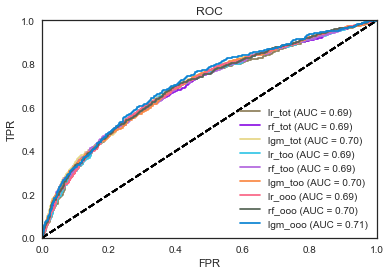

In [400]:
for i in range(3):
    if i == 0:
        key = 'tot'
        pred1 = []
        feat = get_rfecv_feat(X_Train1,Y_Train1)
        
        for model in ['lr','rf','lgm']:
            xa = X_Train1[feat]
            xt = X_Test1[feat]
            pred = getprediction(model,xa,Y_Train1,xt)
            pred1.append(pred)
            plotAUC(Y_Test1,pred,model,key)  
    elif i == 1:
        key = 'too'
        pred2 = []
        feat = get_rfecv_feat(X_Train2,Y_Train2)
        for model in ['lr','rf','lgm']:
            xa = X_Train2[feat]
            xt = X_Test2[feat]
            pred = getprediction(model,xa,Y_Train2,xt)
            pred2.append(pred)
            plotAUC(Y_Test2,pred,model,key)
            
    elif i == 2:
        key = 'ooo'
        pred3 = []
        feat = get_rfecv_feat(X_Train3,Y_Train3)
        for model in ['lr','rf','lgm']:
            xa = X_Train3[feat]
            xt = X_Test3[feat]
            pred = getprediction(model,xa,Y_Train3,xt)
            pred2.append(pred)
            plotAUC(Y_Test3,pred,model,key)
    
        
 
      

# Without feature selection

/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.613777
[2]	training's binary_logloss: 0.612935
[3]	training's binary_logloss: 0.612036
[4]	training's binary_logloss: 0.611146
[5]	training's binary_logloss: 0.610302
[6]	training's binary_logloss: 0.609448
[7]	training's binary_logloss: 0.608635
[8]	training's binary_logloss: 0.607883
[9]	training's binary_logloss: 0.607147
[10]	training's binary_logloss: 0.606449
[11]	training's binary_logloss: 0.605818
[12]	training's binary_logloss: 0.605139
[13]	training's binary_logloss: 0.604563
[14]	training's binary_logloss: 0.603942
[15]	training's binary_logloss: 0.60341
[16]	training's binary_logloss: 0.602793
[17]	training's binary_logloss: 0.602317
[18]	training's binary_logloss: 0.601841
[19]	training's binary_logloss: 0.601324
[20]	training's binary_logloss: 0.600952
[21]	training's binary_logloss: 0.600475
[22]	training's binary_logloss: 0.59999
[23]	training's binary_logloss: 0.599543
[24]	training's binary_logloss: 0.599169
[25]	training's binary_logl

[394]	training's binary_logloss: 0.585732
[395]	training's binary_logloss: 0.58566
[396]	training's binary_logloss: 0.585598
[397]	training's binary_logloss: 0.585526
[398]	training's binary_logloss: 0.585451
[399]	training's binary_logloss: 0.585394
[400]	training's binary_logloss: 0.585343
[401]	training's binary_logloss: 0.585285
[402]	training's binary_logloss: 0.58524
[403]	training's binary_logloss: 0.585183
[404]	training's binary_logloss: 0.585128
[405]	training's binary_logloss: 0.585074
[406]	training's binary_logloss: 0.585006
[407]	training's binary_logloss: 0.584943
[408]	training's binary_logloss: 0.584873
[409]	training's binary_logloss: 0.584806
[410]	training's binary_logloss: 0.584745
[411]	training's binary_logloss: 0.584688
[412]	training's binary_logloss: 0.584634
[413]	training's binary_logloss: 0.584587
[414]	training's binary_logloss: 0.584534
[415]	training's binary_logloss: 0.584483
[416]	training's binary_logloss: 0.584426
[417]	training's binary_logloss: 0.5

/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.613794
[2]	training's binary_logloss: 0.612835
[3]	training's binary_logloss: 0.611939
[4]	training's binary_logloss: 0.611078
[5]	training's binary_logloss: 0.610196
[6]	training's binary_logloss: 0.609351
[7]	training's binary_logloss: 0.608544
[8]	training's binary_logloss: 0.607793
[9]	training's binary_logloss: 0.607064
[10]	training's binary_logloss: 0.606357
[11]	training's binary_logloss: 0.60565
[12]	training's binary_logloss: 0.604969
[13]	training's binary_logloss: 0.604327
[14]	training's binary_logloss: 0.603697
[15]	training's binary_logloss: 0.60309
[16]	training's binary_logloss: 0.602547
[17]	training's binary_logloss: 0.602074
[18]	training's binary_logloss: 0.601516
[19]	training's binary_logloss: 0.601015
[20]	training's binary_logloss: 0.600539
[21]	training's binary_logloss: 0.600067
[22]	training's binary_logloss: 0.599666
[23]	training's binary_logloss: 0.599285
[24]	training's binary_logloss: 0.598923
[25]	training's binary_logl

[199]	training's binary_logloss: 0.593611
[200]	training's binary_logloss: 0.593634
[201]	training's binary_logloss: 0.593651
[202]	training's binary_logloss: 0.593681
[203]	training's binary_logloss: 0.593701
[204]	training's binary_logloss: 0.593722
[205]	training's binary_logloss: 0.593744
[206]	training's binary_logloss: 0.593722
[207]	training's binary_logloss: 0.593718
[208]	training's binary_logloss: 0.593725
[209]	training's binary_logloss: 0.593719
[210]	training's binary_logloss: 0.593722
[211]	training's binary_logloss: 0.593711
[212]	training's binary_logloss: 0.59371
[213]	training's binary_logloss: 0.5937
[214]	training's binary_logloss: 0.593711
[215]	training's binary_logloss: 0.593724
[216]	training's binary_logloss: 0.593726
[217]	training's binary_logloss: 0.593754
[218]	training's binary_logloss: 0.593781
[219]	training's binary_logloss: 0.593805
[220]	training's binary_logloss: 0.593834
[221]	training's binary_logloss: 0.593825
[222]	training's binary_logloss: 0.59

/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.613784
[2]	training's binary_logloss: 0.61284
[3]	training's binary_logloss: 0.611894
[4]	training's binary_logloss: 0.611028
[5]	training's binary_logloss: 0.610144
[6]	training's binary_logloss: 0.609326
[7]	training's binary_logloss: 0.608578
[8]	training's binary_logloss: 0.607827
[9]	training's binary_logloss: 0.607111
[10]	training's binary_logloss: 0.606454
[11]	training's binary_logloss: 0.605761
[12]	training's binary_logloss: 0.605084
[13]	training's binary_logloss: 0.604434
[14]	training's binary_logloss: 0.603816
[15]	training's binary_logloss: 0.603237
[16]	training's binary_logloss: 0.602706
[17]	training's binary_logloss: 0.602218
[18]	training's binary_logloss: 0.60172
[19]	training's binary_logloss: 0.601247
[20]	training's binary_logloss: 0.600737
[21]	training's binary_logloss: 0.600305
[22]	training's binary_logloss: 0.599895
[23]	training's binary_logloss: 0.599505
[24]	training's binary_logloss: 0.599091
[25]	training's binary_logl

[394]	training's binary_logloss: 0.591299
[395]	training's binary_logloss: 0.591232
[396]	training's binary_logloss: 0.591176
[397]	training's binary_logloss: 0.59112
[398]	training's binary_logloss: 0.591065
[399]	training's binary_logloss: 0.591008
[400]	training's binary_logloss: 0.590956
[401]	training's binary_logloss: 0.590914
[402]	training's binary_logloss: 0.590867
[403]	training's binary_logloss: 0.59082
[404]	training's binary_logloss: 0.590778
[405]	training's binary_logloss: 0.590718
[406]	training's binary_logloss: 0.590646
[407]	training's binary_logloss: 0.590568
[408]	training's binary_logloss: 0.590496
[409]	training's binary_logloss: 0.590436
[410]	training's binary_logloss: 0.590378
[411]	training's binary_logloss: 0.590338
[412]	training's binary_logloss: 0.590301
[413]	training's binary_logloss: 0.590269
[414]	training's binary_logloss: 0.590231
[415]	training's binary_logloss: 0.590183
[416]	training's binary_logloss: 0.590148
[417]	training's binary_logloss: 0.5

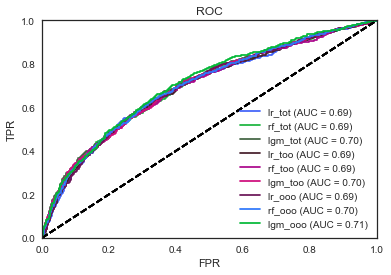

In [401]:

for i in range(3):
    if i == 0:
        key = 'tot'
        pred1 = []
        
        
        for model in ['lr','rf','lgm']:
            xa = X_Train1
            xt = X_Test1
            pred = getprediction(model,xa,Y_Train1,xt)
            pred1.append(pred)
            plotAUC(Y_Test1,pred,model,key)  
    elif i == 1:
        key = 'too'
        pred2 = []
    
        for model in ['lr','rf','lgm']:
            xa = X_Train2
            xt = X_Test2
            pred = getprediction(model,xa,Y_Train2,xt)
            pred2.append(pred)
            plotAUC(Y_Test2,pred,model,key)
            
    elif i == 2:
        key = 'ooo'
        pred3 = []
        feat = get_rfecv_feat(X_Train3,Y_Train3)
        for model in ['lr','rf','lgm']:
            xa = X_Train3
            xt = X_Test3
            pred = getprediction(model,xa,Y_Train3,xt)
            pred2.append(pred)
            plotAUC(Y_Test3,pred,model,key)
    

In [395]:
print(pred1)
0.1*pred1[0] + 0.2*pred1[1]

[array([0.12203897, 0.18065169, 0.08771112, ..., 0.19537717, 0.21271981,
       0.40742231]), array([0.14594366, 0.18047127, 0.12350498, ..., 0.17455942, 0.22145549,
       0.44964956]), array([0.1014554 , 0.40223112, 0.23745486, ..., 0.17632586, 0.17070264,
       0.5277697 ])]


array([0.04139263, 0.05415942, 0.03347211, ..., 0.0544496 , 0.06556308,
       0.13067214])

# Without feature selection:




In [ ]:
weight = [0.3,0.3,0.4]

for i in range(3):
    if i == 0:
        key = 'tot'
        pred1 = []
        
        
        for model in ['lr','rf','lgm']:
            xa = X_Train1
            xt = X_Test1
            pred = getprediction(model,xa,Y_Train1,xt)
            pred1.append(pred)
        wmean1 = weight[0]*pred1[0]+weight[1]*pred1[1]+weight[2]*pred1[2]
        plotAUC(Y_Test1,wmean1,'ave_',key)
    
    elif i == 1:
        key = 'too'
        pred2 = []
     
        for model in ['lr','rf','lgm']:
            xa = X_Train2
            xt = X_Test2
            pred = getprediction(model,xa,Y_Train2,xt)
            pred2.append(pred)
        wmean2 = weight[0]*pred2[0]+weight[1]*pred2[1]+weight[2]*pred2[2]
        plotAUC(Y_Test2,wmean2,'ave',key)
            
    elif i == 2:
        key = 'ooo'
        pred3 = []
        feat = get_rfecv_feat(X_Train3,Y_Train3)
        for model in ['lr','rf','lgm']:
            xa = X_Train3
            xt = X_Test3
            pred = getprediction(model,xa,Y_Train3,xt)
            pred3.append(pred)
        wmean3 = weight[0]*pred3[0]+weight[1]*pred3[1]+weight[2]*pred3[2]
        plotAUC(Y_Test3,wmean3,'ave',key)
    

/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.612382
[2]	training's binary_logloss: 0.610234
[3]	training's binary_logloss: 0.608085
[4]	training's binary_logloss: 0.606125
[5]	training's binary_logloss: 0.604322
[6]	training's binary_logloss: 0.602525
[7]	training's binary_logloss: 0.600891
[8]	training's binary_logloss: 0.599251
[9]	training's binary_logloss: 0.597782
[10]	training's binary_logloss: 0.596365
[11]	training's binary_logloss: 0.594994
[12]	training's binary_logloss: 0.593812
[13]	training's binary_logloss: 0.592543
[14]	training's binary_logloss: 0.591381
[15]	training's binary_logloss: 0.590227
[16]	training's binary_logloss: 0.589208
[17]	training's binary_logloss: 0.588288
[18]	training's binary_logloss: 0.58742
[19]	training's binary_logloss: 0.586625
[20]	training's binary_logloss: 0.585933
[21]	training's binary_logloss: 0.585146
[22]	training's binary_logloss: 0.584457
[23]	training's binary_logloss: 0.583796
[24]	training's binary_logloss: 0.583236
[25]	training's binary_log

[394]	training's binary_logloss: 0.466393
[395]	training's binary_logloss: 0.466037
[396]	training's binary_logloss: 0.465723
[397]	training's binary_logloss: 0.465405
[398]	training's binary_logloss: 0.465124
[399]	training's binary_logloss: 0.464869
[400]	training's binary_logloss: 0.464613
[401]	training's binary_logloss: 0.464291
[402]	training's binary_logloss: 0.464008
[403]	training's binary_logloss: 0.463742
[404]	training's binary_logloss: 0.463498
[405]	training's binary_logloss: 0.463218
[406]	training's binary_logloss: 0.462877
[407]	training's binary_logloss: 0.462577
[408]	training's binary_logloss: 0.462251
[409]	training's binary_logloss: 0.461912
[410]	training's binary_logloss: 0.461577
[411]	training's binary_logloss: 0.461331
[412]	training's binary_logloss: 0.461097
[413]	training's binary_logloss: 0.460859
[414]	training's binary_logloss: 0.460616
[415]	training's binary_logloss: 0.460331
[416]	training's binary_logloss: 0.460154
[417]	training's binary_logloss: 0

[784]	training's binary_logloss: 0.370139
[785]	training's binary_logloss: 0.369924
[786]	training's binary_logloss: 0.369734
[787]	training's binary_logloss: 0.369531
[788]	training's binary_logloss: 0.36933
[789]	training's binary_logloss: 0.369067
[790]	training's binary_logloss: 0.36887
[791]	training's binary_logloss: 0.368599
[792]	training's binary_logloss: 0.36834
[793]	training's binary_logloss: 0.368084
[794]	training's binary_logloss: 0.367865
[795]	training's binary_logloss: 0.367632
[796]	training's binary_logloss: 0.367411
[797]	training's binary_logloss: 0.367199
[798]	training's binary_logloss: 0.366986
[799]	training's binary_logloss: 0.36681
[800]	training's binary_logloss: 0.366646
[801]	training's binary_logloss: 0.366366
[802]	training's binary_logloss: 0.366096
[803]	training's binary_logloss: 0.365821
[804]	training's binary_logloss: 0.365568
[805]	training's binary_logloss: 0.365364
[806]	training's binary_logloss: 0.365128
[807]	training's binary_logloss: 0.364

/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.61185
[2]	training's binary_logloss: 0.60914
[3]	training's binary_logloss: 0.606645
[4]	training's binary_logloss: 0.604272
[5]	training's binary_logloss: 0.602081
[6]	training's binary_logloss: 0.600086
[7]	training's binary_logloss: 0.598176
[8]	training's binary_logloss: 0.596321
[9]	training's binary_logloss: 0.594613
[10]	training's binary_logloss: 0.593011
[11]	training's binary_logloss: 0.591529
[12]	training's binary_logloss: 0.590184
[13]	training's binary_logloss: 0.588889
[14]	training's binary_logloss: 0.587679
[15]	training's binary_logloss: 0.586608
[16]	training's binary_logloss: 0.585524
[17]	training's binary_logloss: 0.584508
[18]	training's binary_logloss: 0.583512
[19]	training's binary_logloss: 0.582446
[20]	training's binary_logloss: 0.58152
[21]	training's binary_logloss: 0.580524
[22]	training's binary_logloss: 0.579628
[23]	training's binary_logloss: 0.578759
[24]	training's binary_logloss: 0.578009
[25]	training's binary_loglo

[394]	training's binary_logloss: 0.45218
[395]	training's binary_logloss: 0.451738
[396]	training's binary_logloss: 0.451401
[397]	training's binary_logloss: 0.451114
[398]	training's binary_logloss: 0.450834
[399]	training's binary_logloss: 0.450547
[400]	training's binary_logloss: 0.45026
[401]	training's binary_logloss: 0.44991
[402]	training's binary_logloss: 0.449598
[403]	training's binary_logloss: 0.449359
[404]	training's binary_logloss: 0.449019
[405]	training's binary_logloss: 0.448761
[406]	training's binary_logloss: 0.448467
[407]	training's binary_logloss: 0.448179
[408]	training's binary_logloss: 0.447909
[409]	training's binary_logloss: 0.447646
[410]	training's binary_logloss: 0.447369
[411]	training's binary_logloss: 0.447123
[412]	training's binary_logloss: 0.446905
[413]	training's binary_logloss: 0.446669
[414]	training's binary_logloss: 0.446459
[415]	training's binary_logloss: 0.44623
[416]	training's binary_logloss: 0.445969
[417]	training's binary_logloss: 0.445

[784]	training's binary_logloss: 0.351829
[785]	training's binary_logloss: 0.35159
[786]	training's binary_logloss: 0.351365
[787]	training's binary_logloss: 0.351141
[788]	training's binary_logloss: 0.350919
[789]	training's binary_logloss: 0.350703
[790]	training's binary_logloss: 0.350491
[791]	training's binary_logloss: 0.350199
[792]	training's binary_logloss: 0.349931
[793]	training's binary_logloss: 0.349683
[794]	training's binary_logloss: 0.349462
[795]	training's binary_logloss: 0.349167
[796]	training's binary_logloss: 0.348968
[797]	training's binary_logloss: 0.348766
[798]	training's binary_logloss: 0.348616
[799]	training's binary_logloss: 0.348448
[800]	training's binary_logloss: 0.348231
[801]	training's binary_logloss: 0.348015
[802]	training's binary_logloss: 0.347798
[803]	training's binary_logloss: 0.347566
[804]	training's binary_logloss: 0.347372
[805]	training's binary_logloss: 0.347195
[806]	training's binary_logloss: 0.346903
[807]	training's binary_logloss: 0.

/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.612254
[2]	training's binary_logloss: 0.609586
[3]	training's binary_logloss: 0.60717
[4]	training's binary_logloss: 0.604861
[5]	training's binary_logloss: 0.602938
[6]	training's binary_logloss: 0.600882
[7]	training's binary_logloss: 0.598923
[8]	training's binary_logloss: 0.597024
[9]	training's binary_logloss: 0.59534
[10]	training's binary_logloss: 0.593725
[11]	training's binary_logloss: 0.592274
[12]	training's binary_logloss: 0.591041
[13]	training's binary_logloss: 0.589714
[14]	training's binary_logloss: 0.58853
[15]	training's binary_logloss: 0.58736
[16]	training's binary_logloss: 0.586167
[17]	training's binary_logloss: 0.585215
[18]	training's binary_logloss: 0.584265
[19]	training's binary_logloss: 0.583404
[20]	training's binary_logloss: 0.582588
[21]	training's binary_logloss: 0.581704
[22]	training's binary_logloss: 0.580858
[23]	training's binary_logloss: 0.580072
[24]	training's binary_logloss: 0.579332
[25]	training's binary_loglos

[394]	training's binary_logloss: 0.457514
[395]	training's binary_logloss: 0.457199
[396]	training's binary_logloss: 0.456865
[397]	training's binary_logloss: 0.456536
[398]	training's binary_logloss: 0.456236
[399]	training's binary_logloss: 0.45593
[400]	training's binary_logloss: 0.455678
[401]	training's binary_logloss: 0.455403
[402]	training's binary_logloss: 0.455039
[403]	training's binary_logloss: 0.454728
[404]	training's binary_logloss: 0.454413
[405]	training's binary_logloss: 0.454134
[406]	training's binary_logloss: 0.453804
[407]	training's binary_logloss: 0.453468
[408]	training's binary_logloss: 0.453132
[409]	training's binary_logloss: 0.452821
[410]	training's binary_logloss: 0.452515
[411]	training's binary_logloss: 0.452263
[412]	training's binary_logloss: 0.452027
[413]	training's binary_logloss: 0.451826
[414]	training's binary_logloss: 0.451591
[415]	training's binary_logloss: 0.451416
[416]	training's binary_logloss: 0.451189
[417]	training's binary_logloss: 0.

[784]	training's binary_logloss: 0.357518
[785]	training's binary_logloss: 0.357238
[786]	training's binary_logloss: 0.357017
[787]	training's binary_logloss: 0.356784
[788]	training's binary_logloss: 0.356554
[789]	training's binary_logloss: 0.356331
[790]	training's binary_logloss: 0.356093
[791]	training's binary_logloss: 0.35587
[792]	training's binary_logloss: 0.355629
[793]	training's binary_logloss: 0.355309
[794]	training's binary_logloss: 0.355099
[795]	training's binary_logloss: 0.354827
[796]	training's binary_logloss: 0.354565
[797]	training's binary_logloss: 0.354332
[798]	training's binary_logloss: 0.354107
[799]	training's binary_logloss: 0.353884
[800]	training's binary_logloss: 0.353687
[801]	training's binary_logloss: 0.353471
[802]	training's binary_logloss: 0.353269
[803]	training's binary_logloss: 0.353052
[804]	training's binary_logloss: 0.352813
[805]	training's binary_logloss: 0.35261
[806]	training's binary_logloss: 0.352371
[807]	training's binary_logloss: 0.3

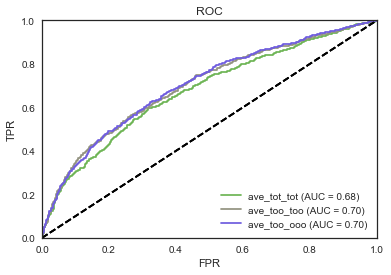

In [398]:
weight = [0.3,0.3,0.4]

for i in range(3):
    if i == 0:
        key = 'tot'
        pred1 = []
        feat = get_rfecv_feat(X_Train1,Y_Train1)
        
        for model in ['lr','rf','lgm']:
            xa = X_Train1[feat]
            xt = X_Test1[feat]
            pred = getprediction(model,xa,Y_Train1,xt)
            pred1.append(pred)
        wmean1 = weight[0]*pred1[0]+weight[1]*pred1[1]+weight[2]*pred1[2]
        plotAUC(Y_Test1,wmean1,'ave_tot',key)
    
    elif i == 1:
        key = 'too'
        pred2 = []
        feat = get_rfecv_feat(X_Train2,Y_Train2)
        for model in ['lr','rf','lgm']:
            xa = X_Train2[feat]
            xt = X_Test2[feat]
            pred = getprediction(model,xa,Y_Train2,xt)
            pred2.append(pred)
        wmean2 = weight[0]*pred2[0]+weight[1]*pred2[1]+weight[2]*pred2[2]
        plotAUC(Y_Test2,wmean2,'ave_too',key)
            
    elif i == 2:
        key = 'ooo'
        pred3 = []
        feat = get_rfecv_feat(X_Train3,Y_Train3)
        for model in ['lr','rf','lgm']:
            xa = X_Train3[feat]
            xt = X_Test3[feat]
            pred = getprediction(model,xa,Y_Train3,xt)
            pred3.append(pred)
        wmean3 = weight[0]*pred3[0]+weight[1]*pred3[1]+weight[2]*pred3[2]
        plotAUC(Y_Test3,wmean3,'ave_too',key)
    
        

In [397]:
pred3

[]